In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Affinity

#### Data representation
- 7-day moving average for daily + Weekly data 

#### Manipulation required:
- Change date representation
- Make Date as index
- Convert objects data type to float

#### Goals: 
- Understand total spending pattern
- Understand spending pattern with different merchants
    - Retail...
- Understand spending pattern with different income

In [27]:
#Affinity credit card data
#Spend_all data represents the % change compared to Jan 2020
df_af = pd.read_csv('data/Affinity - National - Daily.csv')

In [28]:
# Combine 'year', 'month', and 'day' columns into a single datetime column
df_af['Date'] = pd.to_datetime(df_af[['year', 'month', 'day']])

# Drop the original 'year', 'month', and 'day' columns if needed
df_af = df_af.drop(['year', 'month', 'day'], axis=1)

In [29]:
# Define the cutoff date
cutoff_date = pd.to_datetime('2020-01-13')

# Filter the DataFrame to keep rows after the cutoff date
df_af_cleaned = df_af[df_af['Date'] >= cutoff_date]

In [30]:
# Reset the index
df_af_cleaned = df_af_cleaned.reset_index(drop=True)

In [31]:
# Convert the 'Date' column to datetime objects and set it as the index using .loc[]
df_af_cleaned.loc[:, 'Date'] = pd.to_datetime(df_af_cleaned['Date'])
df_af_cleaned.set_index('Date', inplace=True)

In [32]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 5)

In [33]:
df_af_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 945 entries, 2020-01-13 to 2023-10-08
Columns: 139 entries, freq to provisional
dtypes: int64(1), object(138)
memory usage: 1.0+ MB


In [34]:
df_af_cleaned.head()

,freq,spend_all,...,spend_19_retail_w_grocery,provisional
Date,,,,,
2020-01-13,d,-.0155,...,.0358,0
2020-01-14,d,-.0056,...,.0296,0
2020-01-15,d,-.00299,...,.0309,0
2020-01-16,d,-.00941,...,.0303,0
2020-01-17,d,-.0162,...,.0309,0


In [35]:
df_week = df_af_cleaned[df_af_cleaned['freq']=='w']

In [36]:
import pandas as pd

# Assuming df_af_cleaned is your DataFrame

# Convert columns to float, ignoring errors to keep non-convertible columns
df_af_cleaned = df_af_cleaned.apply(pd.to_numeric, errors='ignore')

# If you want to be more explicit, you can select columns to convert like this
cols_to_convert = [col for col in df_af_cleaned.columns if col != 'freq']
df_af_cleaned[cols_to_convert] = df_af_cleaned[cols_to_convert].apply(pd.to_numeric, errors='coerce')


In [37]:
df_af_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 945 entries, 2020-01-13 to 2023-10-08
Columns: 139 entries, freq to provisional
dtypes: float64(137), int64(1), object(1)
memory usage: 1.0+ MB


In [38]:
df_days = df_af_cleaned[df_af_cleaned['freq']=='d']

In [39]:
df_days = df_days.iloc[::7, :]


In [40]:
# Ensure df_week's index is datetime
df_week.index = pd.to_datetime(df_week.index)
df_days.index = pd.to_datetime(df_days.index)

# Combine this new df_weekly_avg DataFrame with df_week
df_combined = pd.concat([df_week, df_days])

# Sort by the index (which should be the date)
df_combined.sort_index(inplace=True)

# Debugging print statement
print("df_combined after concatenation and sort:")
print(df_combined.head())


df_combined after concatenation and sort:
           freq spend_all  ... spend_19_retail_w_grocery provisional
Date                       ...                                      
2020-01-13    d   -0.0155  ...                    0.0358           0
2020-01-20    d    0.0193  ...                    0.0454           0
2020-01-27    d    -0.021  ...                    0.0386           0
2020-02-03    d   0.00435  ...                    0.0484           0
2020-02-10    d  -0.00451  ...                    0.0377           0

[5 rows x 139 columns]


In [41]:
df_combined

,freq,spend_all,...,spend_19_retail_w_grocery,provisional
Date,,,,,
2020-01-13,d,-0.0155,...,0.0358,0
2020-01-20,d,0.0193,...,0.0454,0
2020-01-27,d,-0.021,...,0.0386,0
2020-02-03,d,0.00435,...,0.0484,0
2020-02-10,d,-0.00451,...,0.0377,0
...,...,...,...,...,...
2023-09-10,w,.205,...,.323,0
2023-09-17,w,.212,...,.276,0
2023-09-24,w,.209,...,.29,1


In [42]:
# Drop the 'freq' column
df_af_cleaned.drop('freq', axis=1, inplace=True)

In [9]:
# Convert 'object' columns to numeric, replacing non-numeric values with NaN
object_columns = df_af_cleaned.select_dtypes(include=['object']).columns
df_af_cleaned[object_columns] = df_af_cleaned[object_columns].apply(pd.to_numeric, errors='coerce')

In [43]:
df_af_cleaned.to_csv('Affinity_cleaned_.csv', index=True)

#### Data Visualization and analysis

In [44]:
df_af_cleaned = pd.read_csv('Affinity_cleaned_.csv', index_col=0)
if not isinstance(df_af_cleaned.index, pd.DatetimeIndex):
        df_af_cleaned.index = pd.to_datetime(df_af_cleaned.index)

In [45]:
initial_value = 100
df_af_cleaned = (1 + df_af_cleaned) * initial_value * 100
df_af_cleaned = calculate_YoY_all_columns(df_af_cleaned)

In [8]:
import pandas as pd

def calculate_YoY_all_columns(df):
    """
    Calculates year-over-year (YoY) change for all columns in the DataFrame and drops the original columns.
    
    Parameters:
    - df: DataFrame, the data frame to work on
    
    Returns:
    DataFrame: The DataFrame with YoY changes and the original columns dropped.
    """
    
    # Calculate YoY changes for all columns
    df_yoy = (df / df.shift(12) - 1) * 100.0
    
    # Rename columns with "_YoY" suffix
    df_yoy.columns = [f"{col}_YoY" for col in df_yoy.columns]
    
    # Concatenate the original DataFrame and the YoY DataFrame
    df = pd.concat([df, df_yoy], axis=1)
    
    # Drop the original columns
    df.drop(columns=df.columns[:len(df.columns)//2], inplace=True)
    
    return df

# Example usage:
# Calculate YoY for all columns in your DataFrame and drop the original columns
# Assuming df is your DataFrame
# df = calculate_YoY_all_columns(df)


In [47]:
import ipywidgets as widgets
from ipywidgets import interact, interactive
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_af_cleaned is your DataFrame and 'Date' is already the index in datetime format

# Create dropdown
available_metrics = [col for col in df_af_cleaned.columns]  # 'Date' is not a column, so no need to exclude it
metric_dropdown = widgets.Dropdown(options=available_metrics, description='Metric:', disabled=False)

# Define plotting function
def plot_time_series(metric):
    plt.figure(figsize=(14, 7))
    plt.plot(df_af_cleaned.index, df_af_cleaned[metric], label=metric)  # Use df_af_cleaned.index for the x-axis
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title(f'Time Series Plot of {metric}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Interactive plotting
interactive_plot = interactive(plot_time_series, metric=metric_dropdown)
output = interactive_plot.children[-1]
output.layout.height = '600px'
interactive_plot


interactive(children=(Dropdown(description='Metric:', options=('spend_all_YoY', 'spend_aap_YoY', 'spend_acf_Yo…

In [143]:
import ipywidgets as widgets
from ipywidgets import interact, interactive, HBox, VBox
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_af_cleaned is your DataFrame and 'Date' is already the index in datetime format

# Create multi-select dropdown
available_metrics = [col for col in result_df.columns]
metric_multi_select = widgets.SelectMultiple(options=available_metrics, description='Metrics:', disabled=False)

# Create a button to save the plot
save_button = widgets.Button(description="Save Plot")

# Define plotting function for multiple metrics
def plot_time_series(metrics):
    plt.figure(figsize=(30, 15))
    for metric in metrics:
        plt.plot(result_df.index, result_df[metric], label=metric)
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title('Affinity Credit/Debit Card Spending Data (Percentage change compared to 2020-01)')
    plt.legend(fontsize=20)
    plt.grid(True)
    plt.show()

# Function to handle button click
def save_plot(b):
    plt.figure(figsize=(30, 15))
    for metric in metric_multi_select.value:
        plt.plot(df_exact.index, df_exact[metric], label=metric)
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title('Affinity Credit/Debit Card Spending Data (Percentage change compared to 2020-01)')
    plt.legend(fontsize=20)
    plt.grid(True)
    plt.savefig('time_series_plot.png')

# Bind the button click event to the save function
save_button.on_click(save_plot)

# Interactive plotting
interactive_plot = interactive(plot_time_series, metrics=metric_multi_select)
output = interactive_plot.children[-1]
output.layout.height = '600px'

# Combine interactive plot and button into a layout
layout = VBox([interactive_plot, save_button])
layout


In [50]:
import ipywidgets as widgets
from ipywidgets import interact, interactive, HBox, VBox
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_af_cleaned is your DataFrame and 'Date' is already the index in datetime format

# Create multi-select dropdown
available_metrics = [col for col in df_af_cleaned.columns]
metric_multi_select = widgets.SelectMultiple(options=available_metrics, description='Metrics:', disabled=False)

# Create a button to save the plot
save_button = widgets.Button(description="Save Plot")

# Define plotting function for multiple metrics
def plot_time_series(metrics):
    plt.figure(figsize=(30, 15))
    for metric in metrics:
        plt.plot(df_af_cleaned.index, df_af_cleaned[metric], label=metric)
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title('Affinity Credit/Debit Card Spending Data (Percentage change compared to 2020-01)')
    plt.legend(fontsize=20)
    plt.grid(True)
    plt.show()

# Function to handle button click
def save_plot(b):
    plt.figure(figsize=(30, 15))
    for metric in metric_multi_select.value:
        plt.plot(df_af_cleaned.index, df_af_cleaned[metric], label=metric)
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title('Affinity Credit/Debit Card Spending Data (Percentage change compared to 2020-01)')
    plt.legend(fontsize=20)
    plt.grid(True)
    plt.savefig('time_series_plot.png')

# Bind the button click event to the save function
save_button.on_click(save_plot)

# Interactive plotting
interactive_plot = interactive(plot_time_series, metrics=metric_multi_select)
output = interactive_plot.children[-1]
output.layout.height = '600px'

# Combine interactive plot and button into a layout
layout = VBox([interactive_plot, save_button])
layout


### Lightcast

#### Data representation
- Weekly data 

#### Manipulation required:
- Change date representation
- Make Date as index

#### Goals: 
- Understand total job posting trends
- Understand job posting patterns among all industries
- Understand job posting patterns for differnt skills

In [55]:
df_jp_cleaned.head(10)

,bg_posts,Manufacuring,Financial_activities,Professional_Business,Education_Health,Leisure_Hospitality,bg_posts_jz1,bg_posts_jzgrp12,bg_posts_jz2,bg_posts_jz3,bg_posts_jzgrp345,bg_posts_jz4,bg_posts_jz5,Average
Date,,,,,,,,,,,,,,
2020-01-10,-0.0378,-0.0574,-0.05110,-0.08910,-0.0849,0.0165,0.0698,0.00584,-0.00112,-0.05120,-0.06390,-0.06510,-0.09240,-0.053200
2020-01-17,0.1160,0.1270,0.08500,0.15100,0.1600,0.1150,0.0826,0.10800,0.11000,0.11300,0.12500,0.11200,0.23200,0.127600
2020-01-24,-0.0954,-0.0957,-0.07080,-0.14500,-0.1140,-0.0110,-0.0684,-0.05460,-0.05310,-0.10900,-0.11600,-0.10900,-0.17900,-0.087300
2020-01-31,0.0175,0.0260,0.03690,0.08260,0.0395,-0.1200,-0.0840,-0.05890,-0.05610,0.04720,0.05530,0.06220,0.03950,0.013000
2020-02-07,-0.0945,-0.1000,-0.01570,-0.14700,-0.0802,-0.1130,-0.0410,-0.09070,-0.09610,-0.10700,-0.09990,-0.09250,-0.12000,-0.091180
2020-02-14,0.2050,0.2690,0.20400,0.14000,0.2080,0.0648,0.1470,0.16900,0.17200,0.21000,0.21700,0.21600,0.23700,0.177160
2020-02-21,0.0589,0.0940,-0.02590,0.00357,0.0885,-0.1400,-0.0251,0.02650,0.03210,0.07270,0.07380,0.07280,0.08240,0.004034
2020-02-28,0.0766,0.0743,0.14300,0.07420,0.0972,-0.0161,0.0170,0.00839,0.00745,0.03690,0.10400,0.10400,0.29600,0.074520
2020-03-06,0.0243,0.0181,-0.00266,-0.05640,0.0332,0.0211,0.1290,0.05160,0.04310,-0.00371,0.00573,0.00711,0.02440,0.002668


In [14]:
#Lightcast job postings data
df_jp = pd.read_csv('data/Job Postings - National - Weekly.csv')

In [15]:
df_jp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               197 non-null    int64  
 1   month              197 non-null    int64  
 2   day_endofweek      197 non-null    int64  
 3   bg_posts           197 non-null    float64
 4   bg_posts_ss30      197 non-null    float64
 5   bg_posts_ss55      197 non-null    float64
 6   bg_posts_ss60      197 non-null    float64
 7   bg_posts_ss65      197 non-null    float64
 8   bg_posts_ss70      197 non-null    float64
 9   bg_posts_jz1       197 non-null    float64
 10  bg_posts_jzgrp12   197 non-null    float64
 11  bg_posts_jz2       197 non-null    float64
 12  bg_posts_jz3       197 non-null    float64
 13  bg_posts_jzgrp345  197 non-null    float64
 14  bg_posts_jz4       197 non-null    float64
 15  bg_posts_jz5       197 non-null    float64
dtypes: float64(13), int64(3)
m

In [16]:
# Assuming df_jp is your DataFrame with 'year', 'month', and 'day_endofweek' columns
df_jp = df_jp.rename(columns={'day_endofweek': 'day'})  # Rename the column to 'day'
df_jp['Date'] = pd.to_datetime(df_jp[['year', 'month', 'day']])

# Drop the original 'year', 'month', and 'day' columns if needed
df_jp = df_jp.drop(['year', 'month', 'day'], axis=1)

# Reset the index
df_jp_cleaned = df_jp.reset_index(drop=True)

# Convert the 'Date' column to datetime objects and set it as the index using .loc[]
df_jp_cleaned.loc[:, 'Date'] = pd.to_datetime(df_jp_cleaned['Date'])
df_jp_cleaned.set_index('Date', inplace=True)


In [17]:
def customize_column_names(df, column_mapping):
    """
    Customize column names in a DataFrame.

    Parameters:
    - df: DataFrame to be modified.
    - column_mapping: A dictionary that maps current column names to new names.

    Returns:
    - df with customized column names.
    """
    # Rename columns using the provided mapping
    df.rename(columns=column_mapping, inplace=True)

    return df

# Define a column name mapping
#column_mapping = {'A': 'Column1', 'B': 'Column2', 'C': 'Column3'}
column_mapping = {'bg_posts_ss30': 'Manufacuring', 'bg_posts_ss55': 'Financial_activities', 'bg_posts_ss60': 'Professional_Business', 'bg_posts_ss65': 'Education_Health', 'bg_posts_ss70': 'Leisure_Hospitality'}

# Call the customize_column_names function
df_jp_cleaned = customize_column_names(df_jp_cleaned, column_mapping)


In [18]:
# Assuming your DataFrame is named df
column_names = df_jp_cleaned.columns.tolist()

# Now, 'column_names' contains all the column names as a list
print(column_names)


['bg_posts', 'Manufacuring', 'Financial_activities', 'Professional_Business', 'Education_Health', 'Leisure_Hospitality', 'bg_posts_jz1', 'bg_posts_jzgrp12', 'bg_posts_jz2', 'bg_posts_jz3', 'bg_posts_jzgrp345', 'bg_posts_jz4', 'bg_posts_jz5']


In [19]:
df_jp_cleaned.to_csv('Lightcast_cleaned.csv', index=True)

#### Data Visualization and Analysis

In [11]:
df_jp_cleaned = pd.read_csv('Lightcast_cleaned.csv', index_col=0)
if not isinstance(df_jp_cleaned.index, pd.DatetimeIndex):
        df_jp_cleaned.index = pd.to_datetime(df_jp_cleaned.index)

In [13]:
initial_value = 100
df_jp_cleaned = (1 + df_jp_cleaned) * initial_value * 100


In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [14]:
df_jp_cleaned = calculate_YoY_all_columns(df_jp_cleaned)

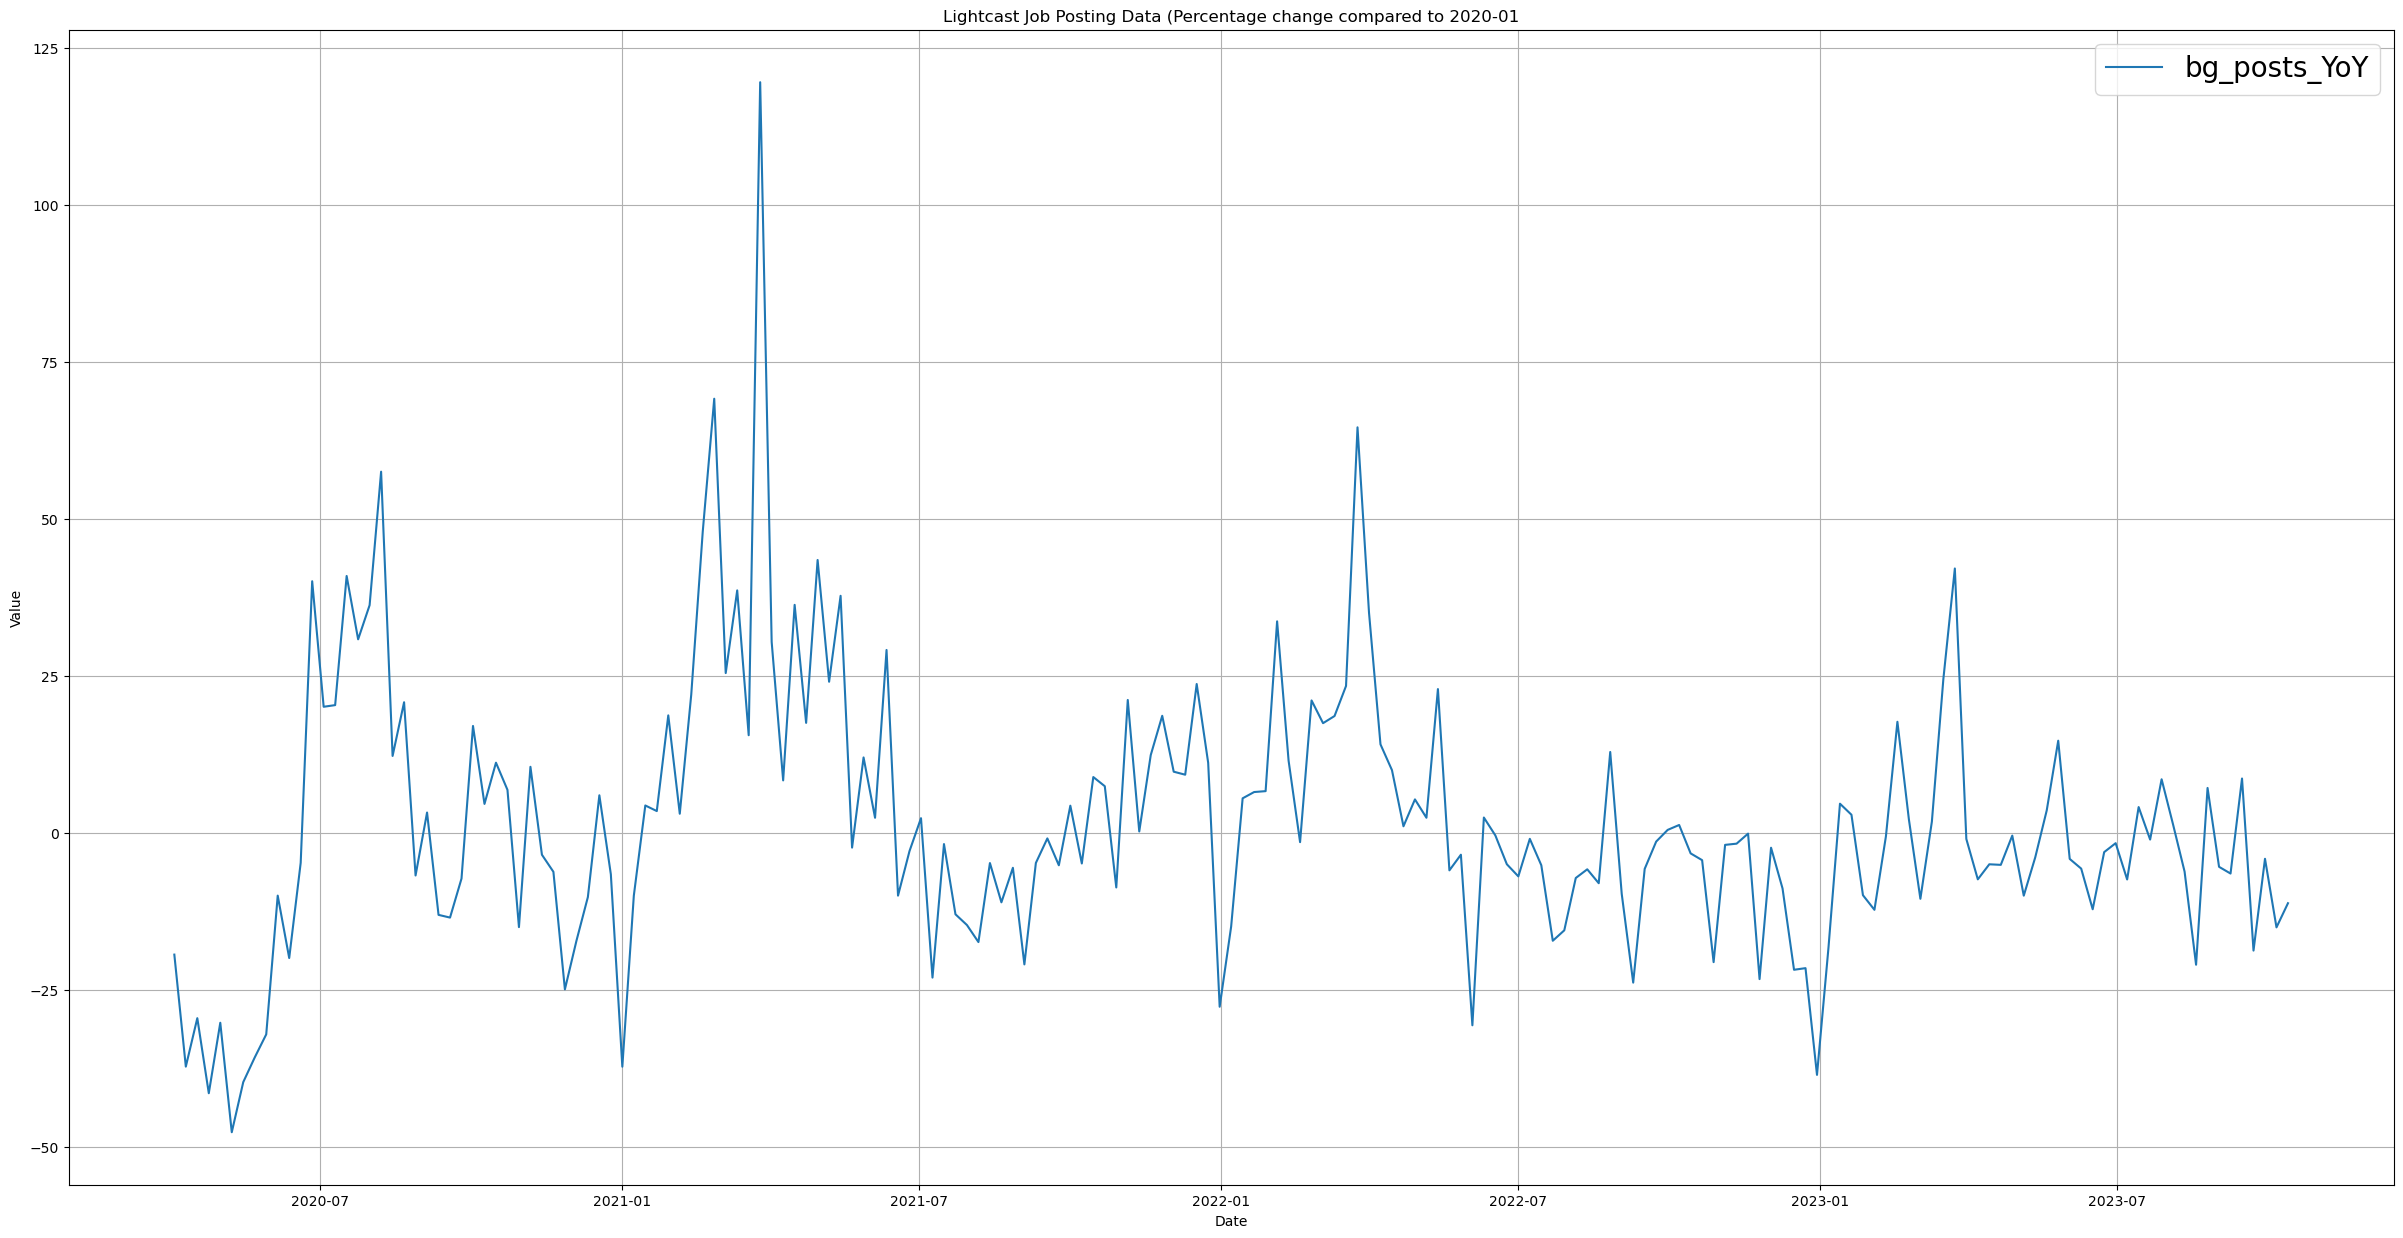

In [49]:
import ipywidgets as widgets
from ipywidgets import interact, interactive, HBox, VBox
import matplotlib.pyplot as plt
import pandas as pd
# Assuming df_af_cleaned is your DataFrame and 'Date' is already the index in datetime format

# Create multi-select dropdown
available_metrics = [col for col in df_jp_cleaned.columns]
metric_multi_select = widgets.SelectMultiple(options=available_metrics, description='Metrics:', disabled=False)

# Create a button to save the plot
save_button = widgets.Button(description="Save Plot")

# Define plotting function for multiple metrics
def plot_time_series(metrics):
    plt.figure(figsize=(30, 15))
    for metric in metrics:
        plt.plot(df_jp_cleaned.index, df_jp_cleaned[metric], label=metric)
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title('Lightcast Job Posting Data (Percentage change compared to 2020-01)')
    # Customize the legend font size
    plt.legend(fontsize=20)
    plt.grid(True)
    plt.show()

# Function to handle button click
def save_plot(b):
    plt.figure(figsize=(30, 15))
    for metric in metric_multi_select.value:
        plt.plot(df_jp_cleaned.index, df_jp_cleaned[metric], label=metric)
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title('Lightcast Job Posting Data (Percentage change compared to 2020-01')
    # Customize the legend font size
    plt.legend(fontsize=20)
    plt.grid(True)
    plt.savefig('time_series_plot.png')

# Bind the button click event to the save function
save_button.on_click(save_plot)

# Interactive plotting
interactive_plot = interactive(plot_time_series, metrics=metric_multi_select)
output = interactive_plot.children[-1]
output.layout.height = '600'

# Combine interactive plot and button into a layout
layout = VBox([interactive_plot, save_button])
layout


In [162]:
# Assuming df_af_cleaned is your DataFrame and 'Date' is already the index in datetime format

# Create multi-select dropdown
available_metrics = [col for col in df_jp_cleaned.columns]
metric_multi_select = widgets.SelectMultiple(options=available_metrics, description='Metrics:', disabled=False)

# Create a button to save the plot
save_button = widgets.Button(description="Save Plot")

# Define plotting function for multiple metrics
def plot_time_series(metrics):
    plt.figure(figsize=(30, 15))
    for metric in metrics:
        plt.plot(df_jp_cleaned.index, df_jp_cleaned[metric], label=metric)
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title('Lightcast Job Posting Data (Percentage change compared to 2020-01)')
    # Customize the legend font size
    plt.legend(fontsize=20)
    plt.grid(True)
    plt.show()

# Function to handle button click
def save_plot(b):
    plt.figure(figsize=(30, 15))
    for metric in metric_multi_select.value:
        plt.plot(df_jp_cleaned.index, df_jp_cleaned[metric], label=metric)
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title('Lightcast Job Posting Data (Percentage change compared to 2020-01')
    # Customize the legend font size
    plt.legend(fontsize=20)
    plt.grid(True)
    plt.savefig('time_series_plot.png')

# Bind the button click event to the save function
save_button.on_click(save_plot)

# Interactive plotting
interactive_plot = interactive(plot_time_series, metrics=metric_multi_select)
output = interactive_plot.children[-1]
output.layout.height = '600'

# Combine interactive plot and button into a layout
layout = VBox([interactive_plot, save_button])
layout3


In [43]:
# Assuming your DataFrame is named df
column_names = df_jp_cleaned.columns.tolist()
# Now, 'column_names' contains all the column names as a list
print(column_names)


['bg_posts', 'Manufacuring', 'Financial_activities', 'Professional_Business', 'Education_Health', 'Leisure_Hospitality', 'bg_posts_jz1', 'bg_posts_jzgrp12', 'bg_posts_jz2', 'bg_posts_jz3', 'bg_posts_jzgrp345', 'bg_posts_jz4', 'bg_posts_jz5']


In [45]:
def add_average_column(df, column_names, new_column_name):
    """
    Add a new column to the DataFrame that computes the average of specified columns.
    
    Parameters:
    - df: The DataFrame to which the column will be added.
    - column_names: List of column names to compute the average from.
    - new_column_name: Name of the new column to store the average values.
    """
    # Calculate the average of the specified columns along the rows (axis=1)
    df[new_column_name] = df[column_names].mean(axis=1)
    return df

# Example usage:
# Assuming you have a DataFrame df and want to compute the average of columns 'col1' and 'col2'
# and add a new column 'average_col' to store the average values.
df_jp_cleaned = add_average_column(df_jp_cleaned, ['Manufacuring', 'Financial_activities', 'Professional_Business', 'Education_Health', 'Leisure_Hospitality'], 'Average')

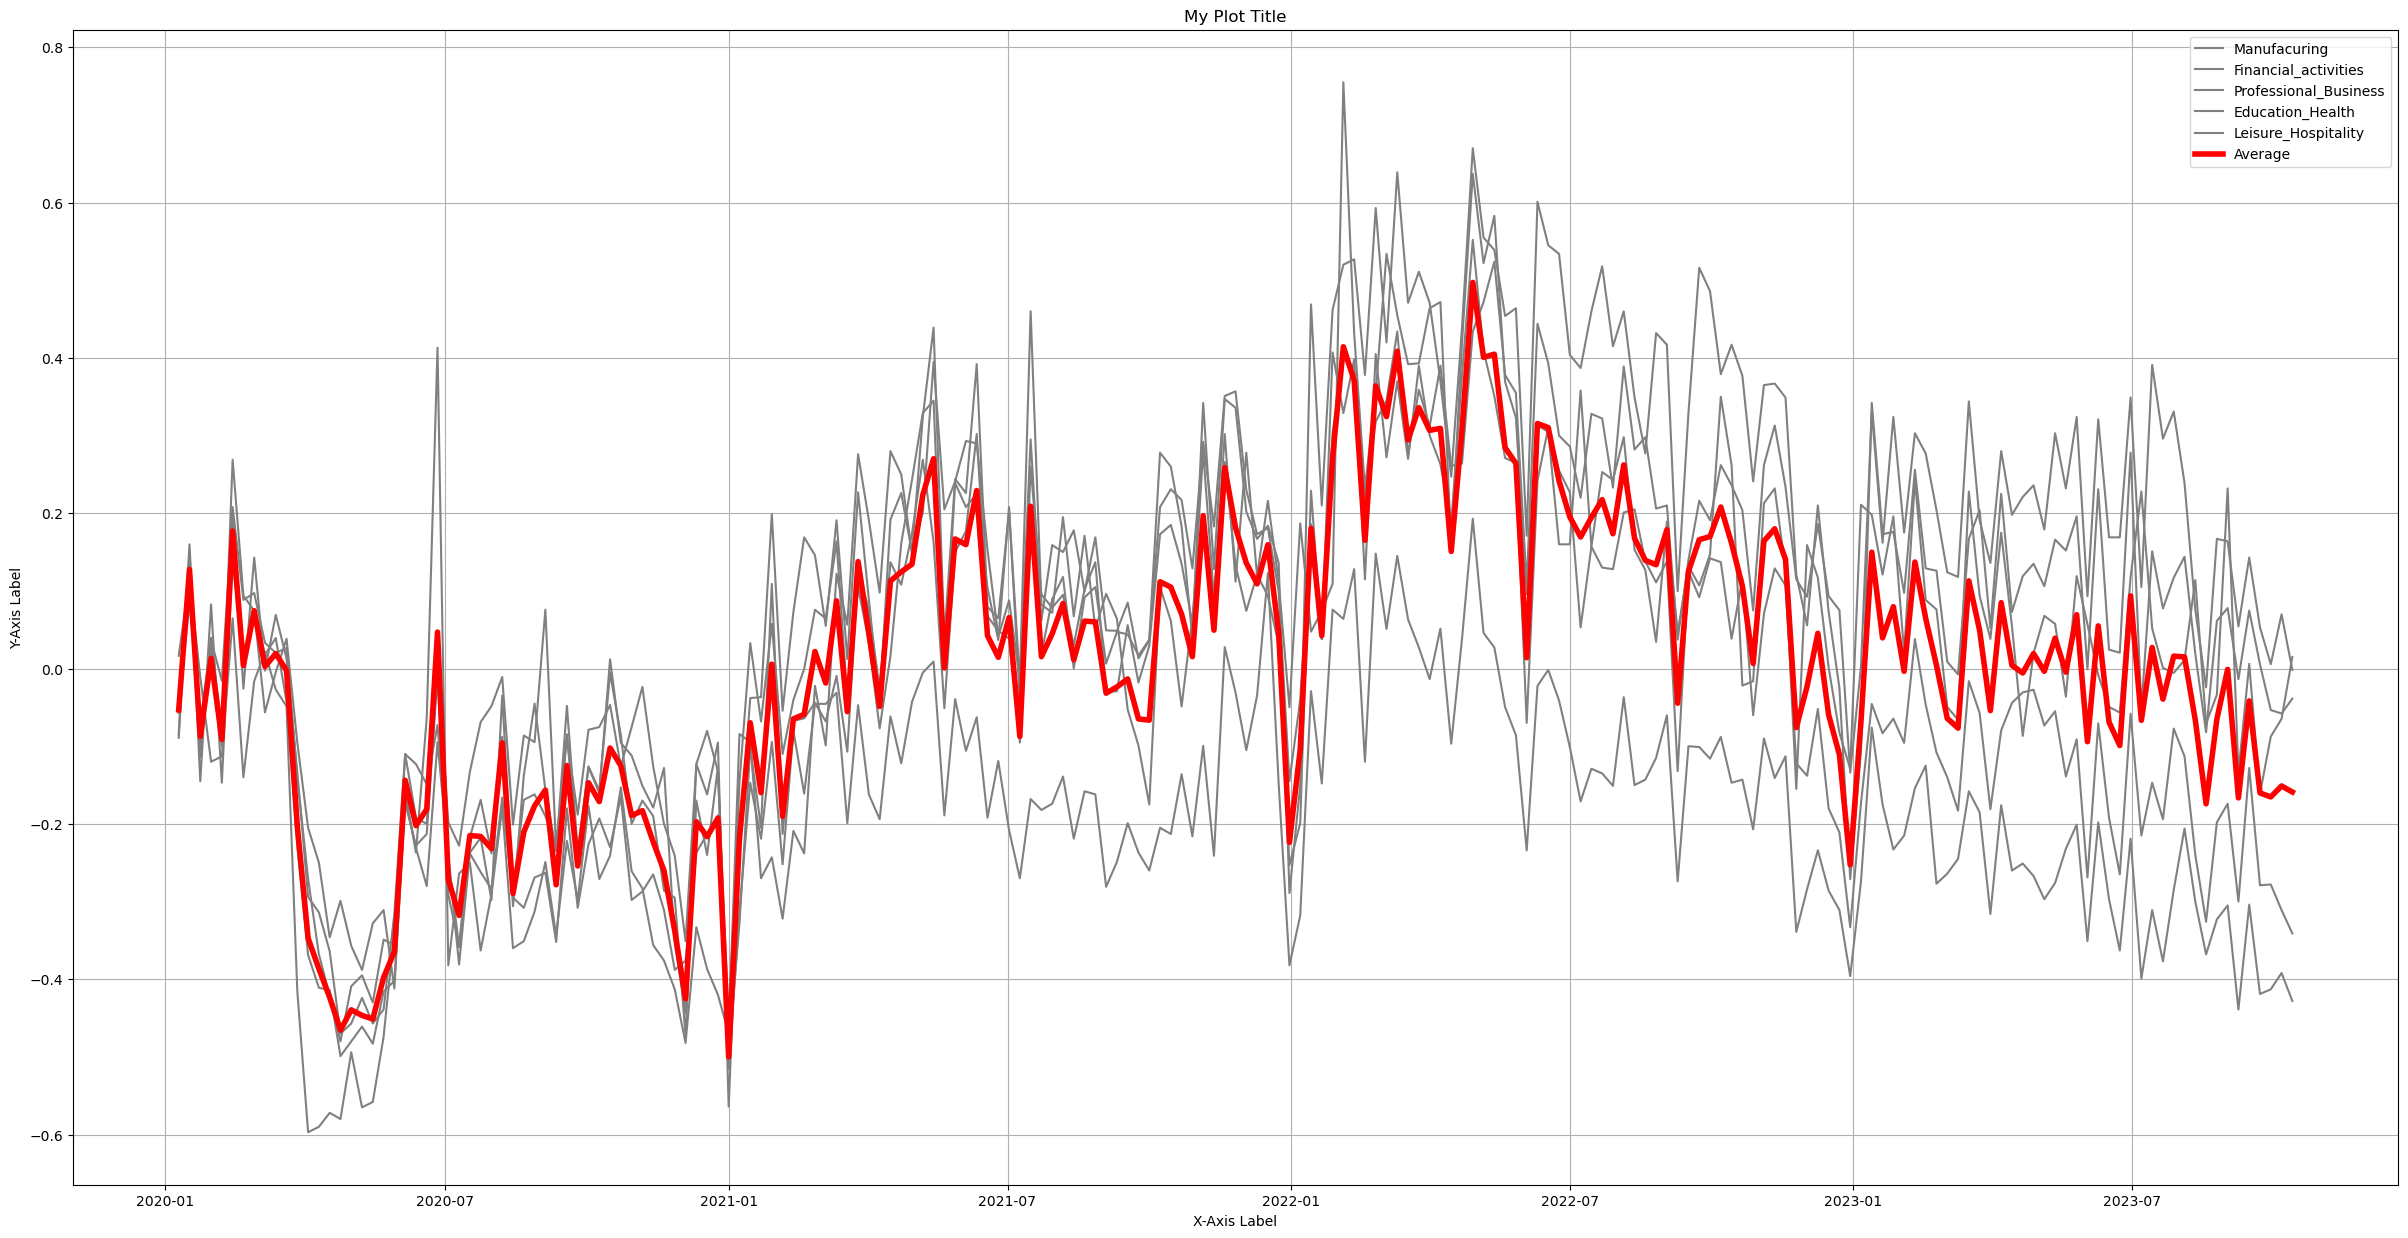

In [49]:
def plot_dataframe(df, column_names, title=""):
    """
    Plot specified columns from a DataFrame in gray, and plot a column named 'Average' in bold red.

    Parameters:
    - df: The DataFrame containing the data to be plotted.
    - column_names: List of column names to be plotted in gray.
    - title: The title of the plot (optional).
    """
    plt.figure(figsize=(30, 15))
    
    # Plot specified columns in gray
    for column in column_names:
        plt.plot(df.index, df[column], color='gray', label=column)
    
    # Plot the 'Average' column in bold red
    if 'Average' in df.columns:
        plt.plot(df.index, df['Average'], color='red', linewidth=4, label='Average')
    
    plt.xlabel('X-Axis Label')
    plt.ylabel('Y-Axis Label')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
# Assuming you have a DataFrame df with columns to plot
# and you want to include a column named 'Average' in red.
# Replace column_names and title as needed.
plot_dataframe(df_jp_cleaned, column_names=['Manufacuring', 'Financial_activities', 'Professional_Business', 'Education_Health', 'Leisure_Hospitality'], title='My Plot Title')


In [82]:
# Assuming the 'Average' column contains percentage changes
original_value = 100  # Original value

# Convert percentage changes to actual values
df_jp_cleaned['Average_values'] = (1+df_jp_cleaned['Average']/100) * original_value

In [83]:
# Calculate the rolling average over a window of 4 periods
window_size = 4
df_jp_cleaned['Average_values_smooth'] = df_jp_cleaned['Average_values'].rolling(window=window_size).mean()

### Paychex&Intuit

#### Data representation
- Weekly data 

#### Manipulation required:
- Change date representation
- Make Date as index
- Convert object to float
- Rename certain column names

#### Goals: 
- Understand total employment level
- Understand employment level from different income
- Understand employment level from differnt industries

In [22]:
#Paychex and Intuit employemnt data
df_emp = pd.read_csv('data/Employment - National - Weekly.csv')

In [23]:
df_emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      187 non-null    int64  
 1   month                     187 non-null    int64  
 2   day_endofweek             187 non-null    int64  
 3   emp                       187 non-null    float64
 4   emp_incq1                 187 non-null    float64
 5   emp_incq2                 187 non-null    float64
 6   emp_incq3                 187 non-null    float64
 7   emp_incq4                 187 non-null    object 
 8   emp_incmiddle             187 non-null    float64
 9   emp_incbelowmed           187 non-null    float64
 10  emp_incabovemed           187 non-null    object 
 11  emp_subset_unweighted_q1  187 non-null    float64
 12  emp_subset_unweighted_q2  187 non-null    float64
 13  emp_subset_unweighted_q3  187 non-null    float64
 14  emp_subset

In [24]:
# Assuming df_jp is your DataFrame with 'year', 'month', and 'day_endofweek' columns
df_emp = df_emp.rename(columns={'day_endofweek': 'day'})  # Rename the column to 'day'
df_emp['Date'] = pd.to_datetime(df_emp[['year', 'month', 'day']])

# Drop the original 'year', 'month', and 'day' columns if needed
df_emp = df_emp.drop(['year', 'month', 'day'], axis=1)

# Reset the index
df_emp_cleaned = df_emp.reset_index(drop=True)

# Convert the 'Date' column to datetime objects and set it as the index using .loc[]
df_emp_cleaned.loc[:, 'Date'] = pd.to_datetime(df_emp_cleaned['Date'])
df_emp_cleaned.set_index('Date', inplace=True)


In [25]:
# Convert 'object' columns to numeric, replacing non-numeric values with NaN
object_columns = df_emp_cleaned.select_dtypes(include=['object']).columns
df_emp_cleaned[object_columns] = df_emp_cleaned[object_columns].apply(pd.to_numeric, errors='coerce')

In [26]:
def customize_column_names(df, column_mapping):
    """
    Customize column names in a DataFrame.

    Parameters:
    - df: DataFrame to be modified.
    - column_mapping: A dictionary that maps current column names to new names.

    Returns:
    - df with customized column names.
    """
    # Rename columns using the provided mapping
    df.rename(columns=column_mapping, inplace=True)

    return df

# Define a column name mapping
#column_mapping = {'A': 'Column1', 'B': 'Column2', 'C': 'Column3'}
column_mapping = {'emp_retail': 'Retail', 'emp_s72': 'Accomodation_Food', 'emp_ss70': 'Leisure_Hospitality', 'emp_ss65': 'Education_Health', 'emp_ss60': 'Professional_Business', 'emp_ss40': 'Trade_Transportation_Utilities'}

# Call the customize_column_names function
df_emp_cleaned = customize_column_names(df_emp_cleaned, column_mapping)


In [27]:
df_emp_cleaned.to_csv('Paychex_Intuit_cleaned.csv', index=True)

#### Data Visualization & Analysis

In [19]:
df_emp_cleaned = pd.read_csv('Paychex_Intuit_cleaned.csv', index_col=0)
if not isinstance(df_emp_cleaned.index, pd.DatetimeIndex):
        df_emp_cleaned.index = pd.to_datetime(df_emp_cleaned.index)

In [20]:
initial_value = 100
df_emp_cleaned = (1 + df_emp_cleaned) * initial_value * 100
df_emp_cleaned = calculate_YoY_all_columns(df_emp_cleaned)

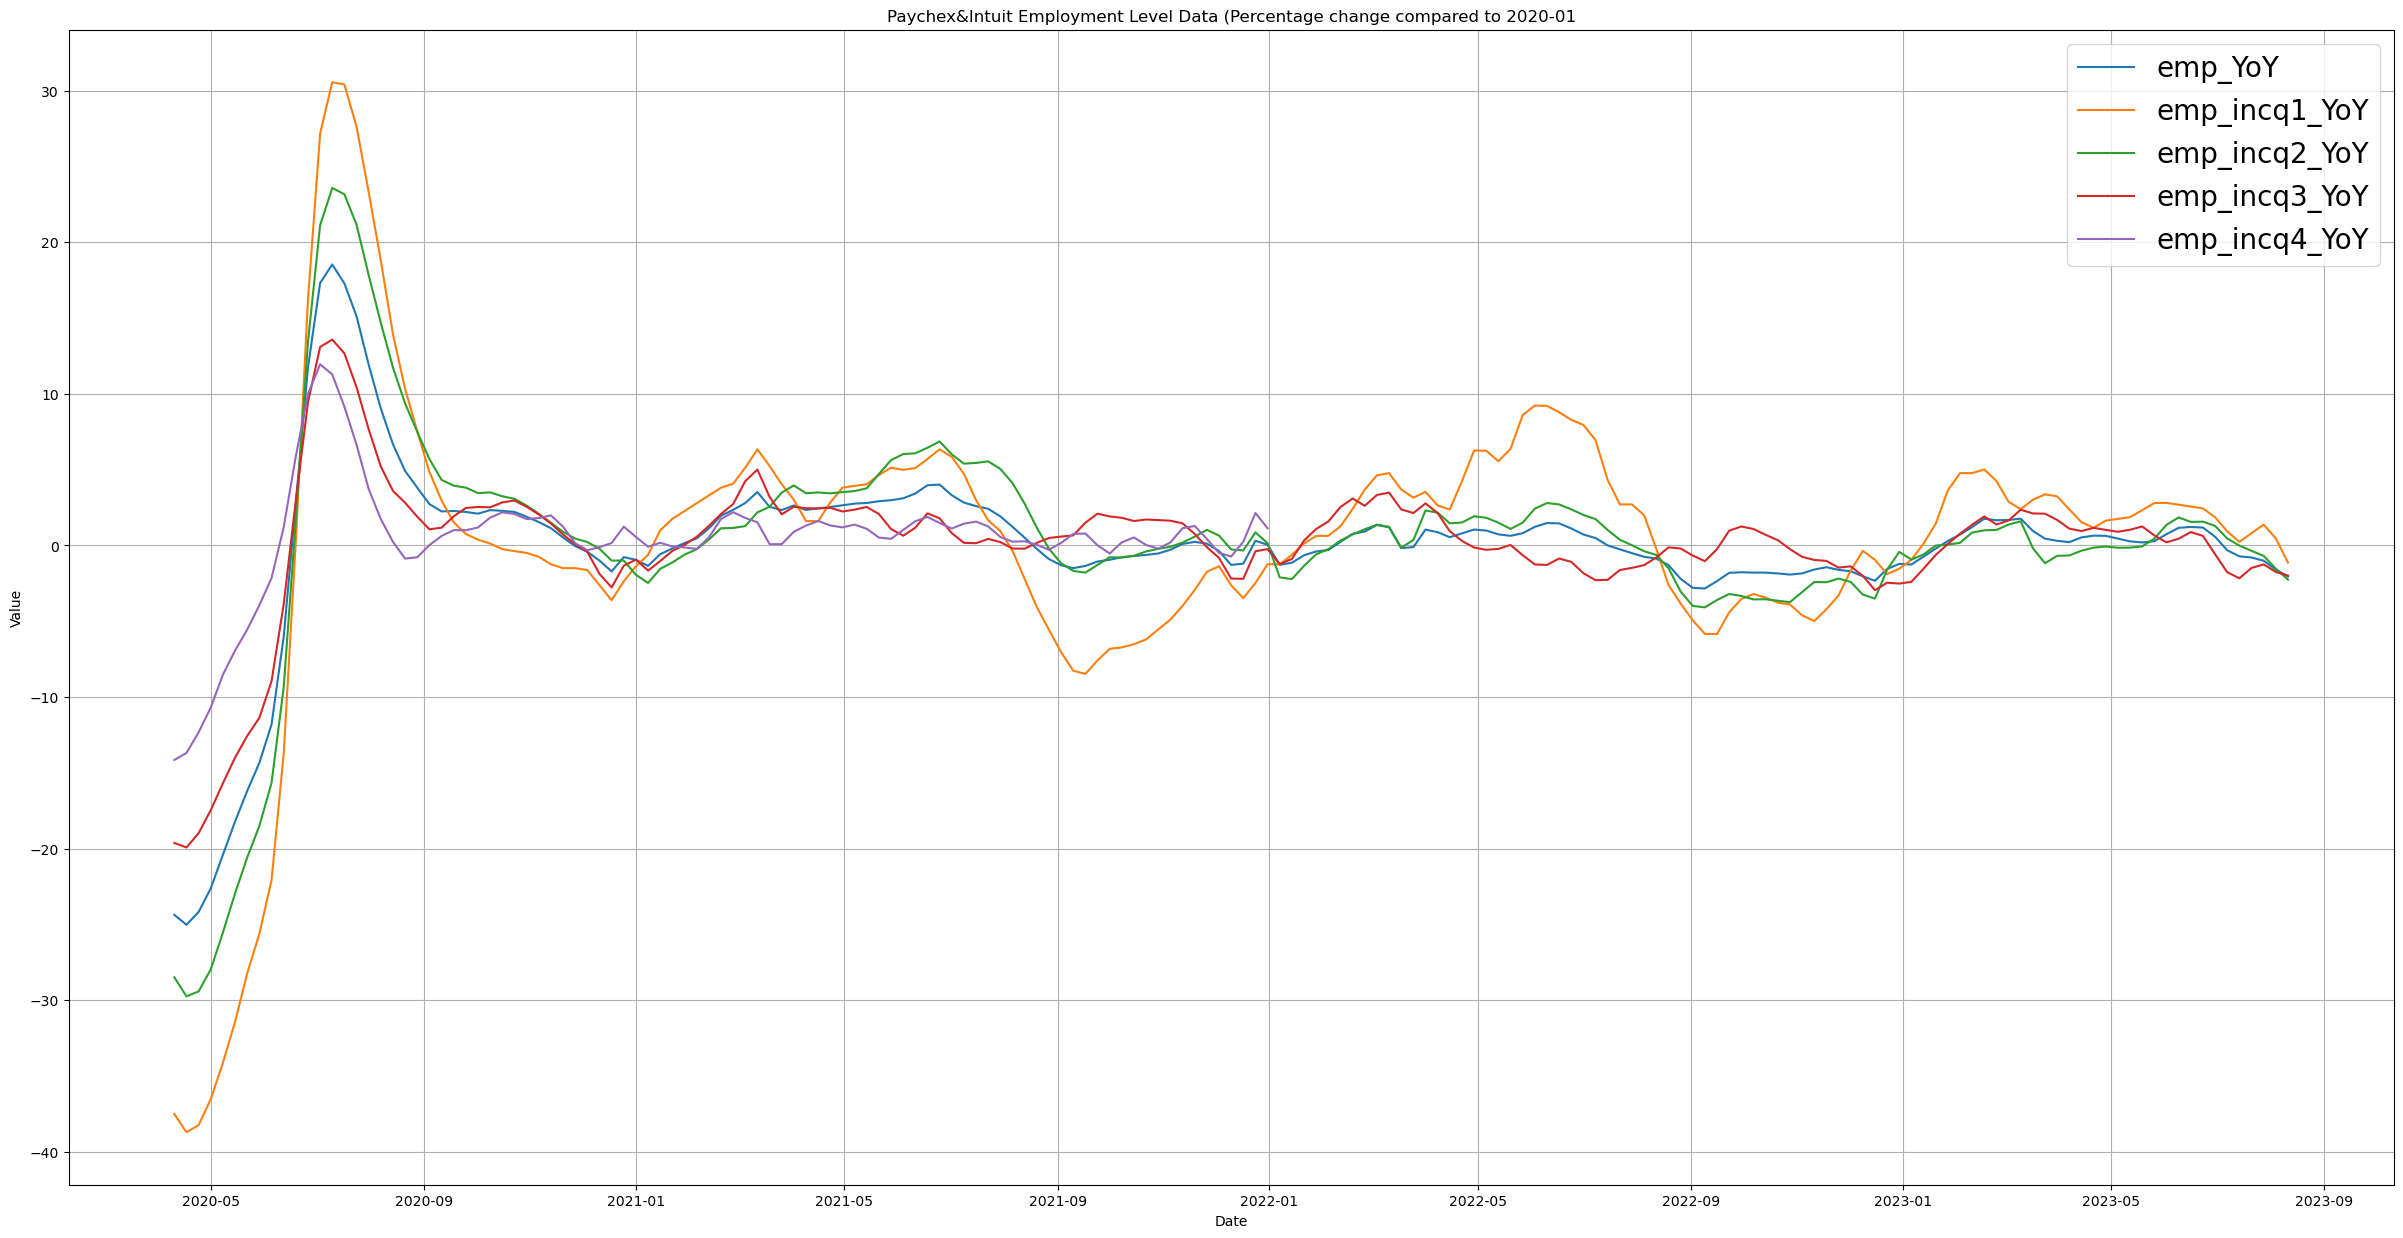

In [48]:
# Assuming df_af_cleaned is your DataFrame and 'Date' is already the index in datetime format

# Create multi-select dropdown
available_metrics = [col for col in df_emp_cleaned.columns]
metric_multi_select = widgets.SelectMultiple(options=available_metrics, description='Metrics:', disabled=False)

# Create a button to save the plot
save_button = widgets.Button(description="Save Plot")

# Define plotting function for multiple metrics
def plot_time_series(metrics):
    plt.figure(figsize=(30, 15))
    for metric in metrics:
        plt.plot(df_emp_cleaned.index, df_emp_cleaned[metric], label=metric)
    # Customize the legend font size
    plt.legend(fontsize=20)
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title('Paychex&Intuit Employment Level Data (Percentage change compared to 2020-01)')
    plt.grid(True)
    plt.show()

# Function to handle button click
def save_plot(b):
    plt.figure(figsize=(30, 15))
    for metric in metric_multi_select.value:
        plt.plot(df_emp_cleaned.index, df_emp_cleaned[metric], label=metric)
    # Customize the legend font size
    plt.legend(fontsize=20)
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title('Paychex&Intuit Employment Level Data (Percentage change compared to 2020-01')
    plt.grid(True)
    plt.savefig('time_series_plot.png')

# Bind the button click event to the save function
save_button.on_click(save_plot)

# Interactive plotting
interactive_plot = interactive(plot_time_series, metrics=metric_multi_select)
output = interactive_plot.children[-1]
output.layout.height = '600'

# Combine interactive plot and button into a layout
layout = VBox([interactive_plot, save_button])
layout


In [29]:
# Assuming df_af_cleaned is your DataFrame and 'Date' is already the index in datetime format

# Create multi-select dropdown
available_metrics = [col for col in df_emp_cleaned.columns]
metric_multi_select = widgets.SelectMultiple(options=available_metrics, description='Metrics:', disabled=False)

# Create a button to save the plot
save_button = widgets.Button(description="Save Plot")

# Define plotting function for multiple metrics
def plot_time_series(metrics):
    plt.figure(figsize=(30, 15))
    for metric in metrics:
        plt.plot(df_emp_cleaned.index, df_emp_cleaned[metric], label=metric)
    # Customize the legend font size
    plt.legend(fontsize=20)
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title('Paychex&Intuit Employment Level Data (Percentage change compared to 2020-01)')
    plt.grid(True)
    plt.show()

# Function to handle button click
def save_plot(b):
    plt.figure(figsize=(30, 15))
    for metric in metric_multi_select.value:
        plt.plot(df_emp_cleaned.index, df_emp_cleaned[metric], label=metric)
    # Customize the legend font size
    plt.legend(fontsize=20)
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title('Paychex&Intuit Employment Level Data (Percentage change compared to 2020-01')
    plt.grid(True)
    plt.savefig('time_series_plot.png')

# Bind the button click event to the save function
save_button.on_click(save_plot)

# Interactive plotting
interactive_plot = interactive(plot_time_series, metrics=metric_multi_select)
output = interactive_plot.children[-1]
output.layout.height = '600'

# Combine interactive plot and button into a layout
layout = VBox([interactive_plot, save_button])
layout


In [30]:
# Assuming df_af_cleaned is your DataFrame and 'Date' is already the index in datetime format

# Create multi-select dropdown
available_metrics = [col for col in df_emp_cleaned.columns]
metric_multi_select = widgets.SelectMultiple(options=available_metrics, description='Metrics:', disabled=False)

# Create a button to save the plot
save_button = widgets.Button(description="Save Plot")

# Define plotting function for multiple metrics
def plot_time_series(metrics):
    plt.figure(figsize=(30, 15))
    for metric in metrics:
        plt.plot(df_emp_cleaned.index, df_emp_cleaned[metric], label=metric)
    # Customize the legend font size
    plt.legend(fontsize=20)
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title('Paychex&Intuit Employment Level Data (Percentage change compared to 2020-01)')
    plt.grid(True)
    plt.show()

# Function to handle button click
def save_plot(b):
    plt.figure(figsize=(30, 15))
    for metric in metric_multi_select.value:
        plt.plot(df_emp_cleaned.index, df_emp_cleaned[metric], label=metric)
    # Customize the legend font size
    plt.legend(fontsize=20)
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title('Paychex&Intuit Employment Level Data (Percentage change compared to 2020-01')
    plt.grid(True)
    plt.savefig('time_series_plot.png')

# Bind the button click event to the save function
save_button.on_click(save_plot)

# Interactive plotting
interactive_plot = interactive(plot_time_series, metrics=metric_multi_select)
output = interactive_plot.children[-1]
output.layout.height = '600'

# Combine interactive plot and button into a layout
layout = VBox([interactive_plot, save_button])
layout


### Womply

#### Data representation
- Weekly data 

#### Manipulation required:
- Change date representation
- Make Date as index

#### Goals: 
- Understand total revenue change for small businesses
    - Also for different industries
- Understand total open number change for small businesses
    - Also for different industries

In [50]:
#Womply small business revenue and open data
df_sbiz = pd.read_csv('data/Womply - National - Weekly.csv')

In [51]:
# Assuming df_jp is your DataFrame with 'year', 'month', and 'day_endofweek' columns
df_sbiz = df_sbiz.rename(columns={'day_endofweek': 'day'})  # Rename the column to 'day'
df_sbiz['Date'] = pd.to_datetime(df_sbiz[['year', 'month', 'day']])

# Drop the original 'year', 'month', and 'day' columns if needed
df_sbiz = df_sbiz.drop(['year', 'month', 'day'], axis=1)

# Reset the index
df_sbiz_cleaned = df_sbiz.reset_index(drop=True)

# Convert the 'Date' column to datetime objects and set it as the index using .loc[]
df_sbiz_cleaned.loc[:, 'Date'] = pd.to_datetime(df_sbiz_cleaned['Date'])
df_sbiz_cleaned.set_index('Date', inplace=True)


In [52]:
df_sbiz_cleaned.to_csv('Womply_cleaned.csv', index=True)

#### Data Visualization & Analysis

In [24]:
df_sbiz_cleaned = pd.read_csv('Womply_cleaned.csv', index_col=0)
if not isinstance(df_sbiz_cleaned.index, pd.DatetimeIndex):
        df_sbiz_cleaned.index = pd.to_datetime(df_sbiz_cleaned.index)

In [25]:
initial_value = 100
df_sbiz_cleaned = (1 + df_sbiz_cleaned) * initial_value * 100
df_sbiz_cleaned = calculate_YoY_all_columns(df_sbiz_cleaned)

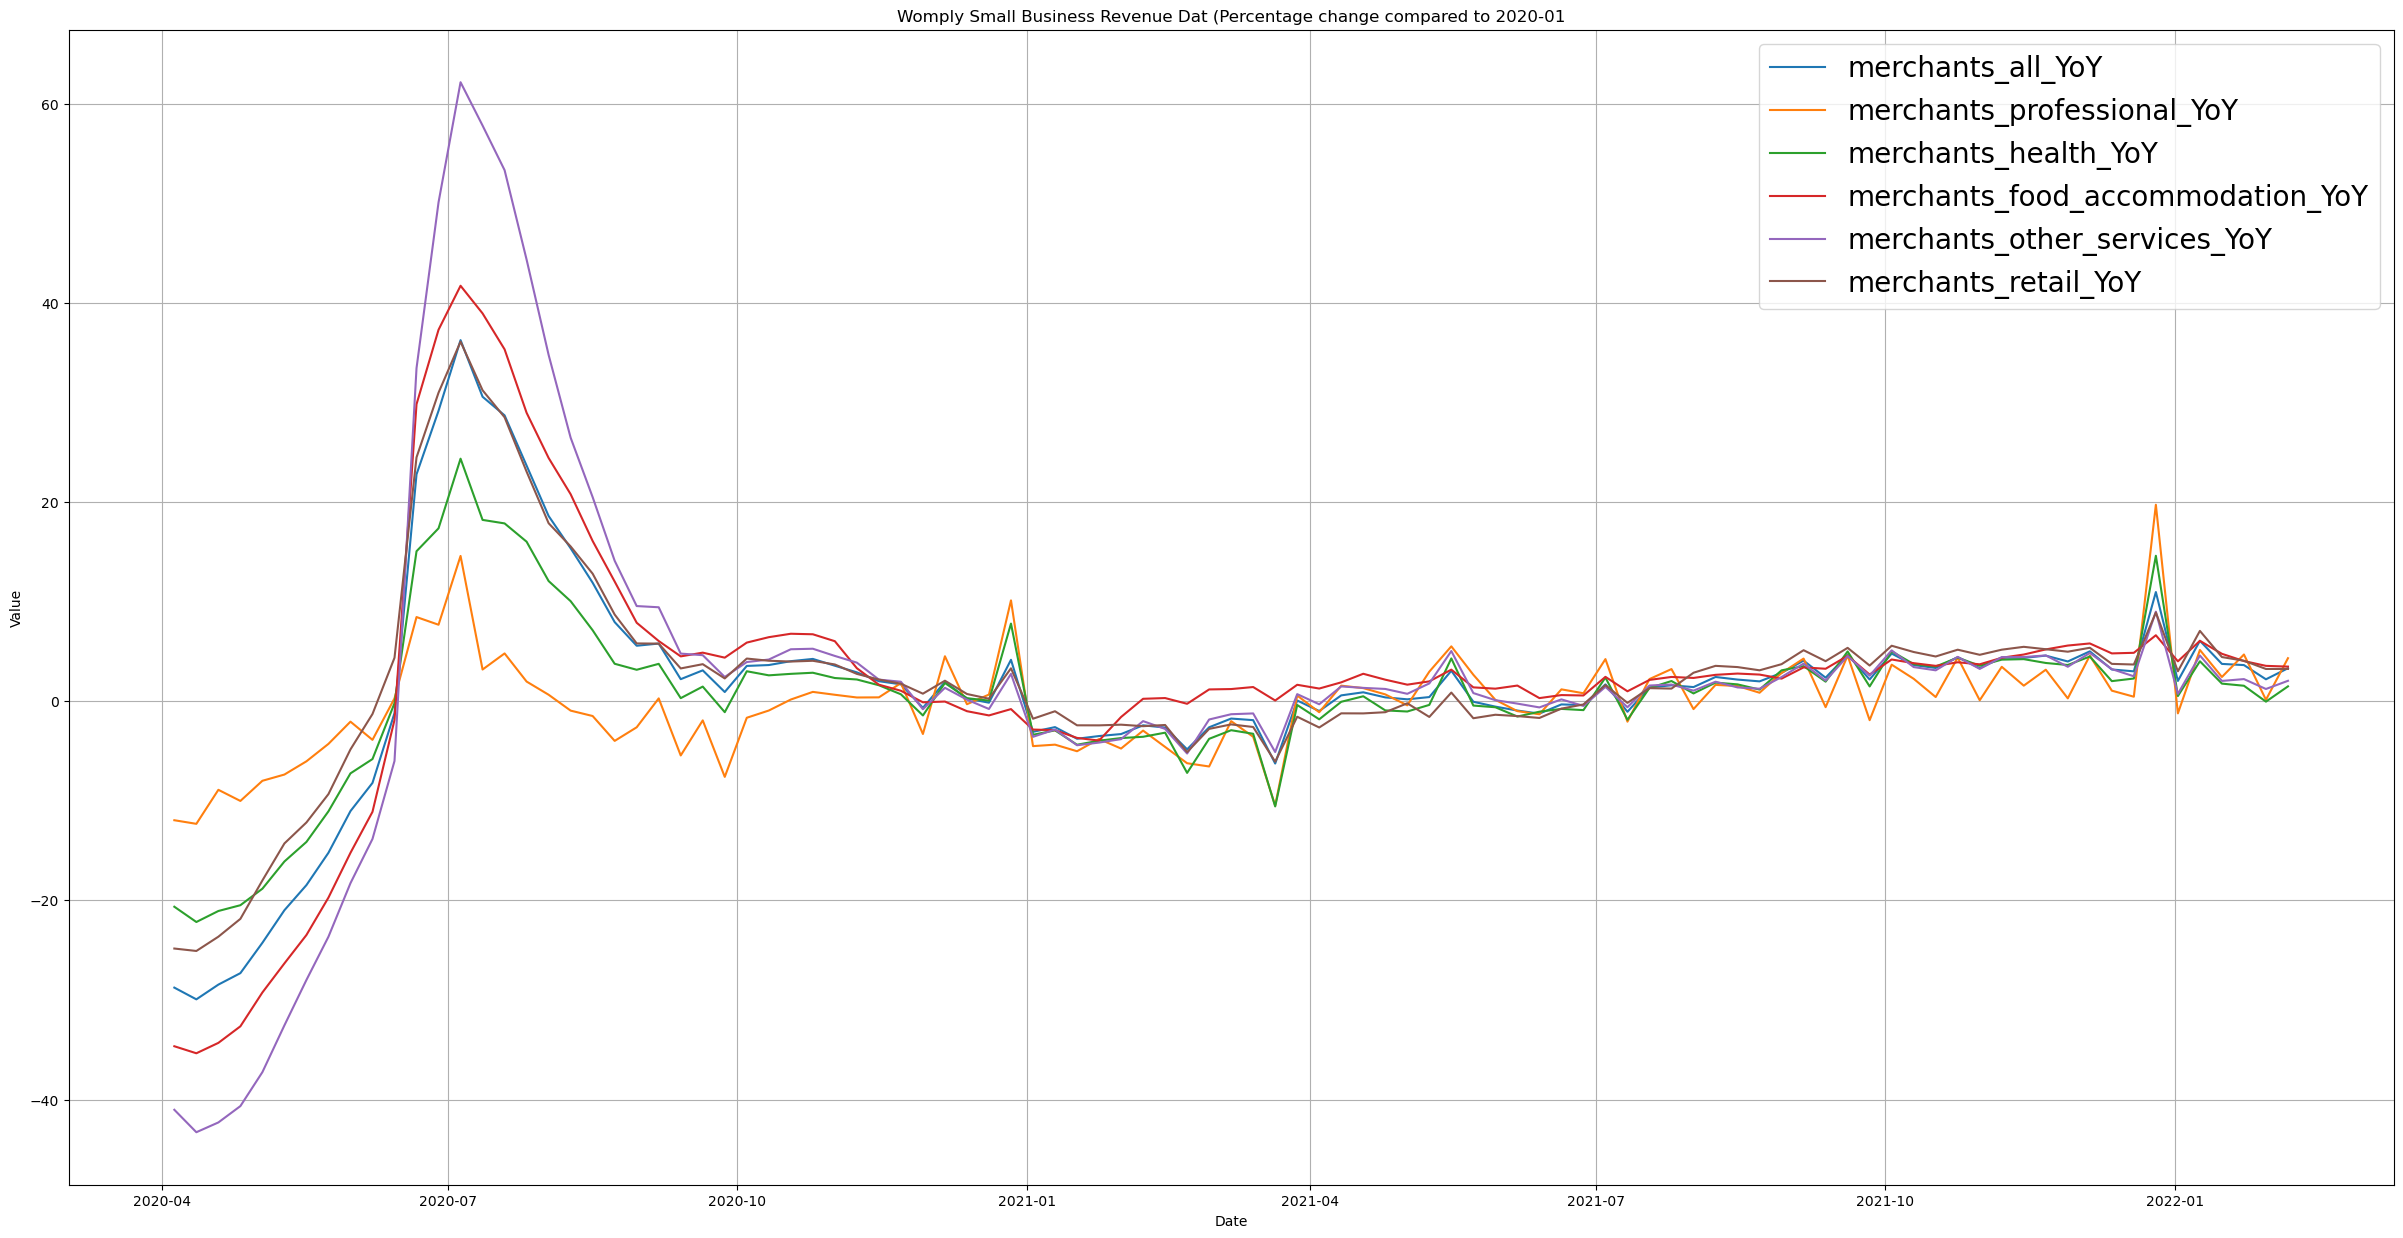

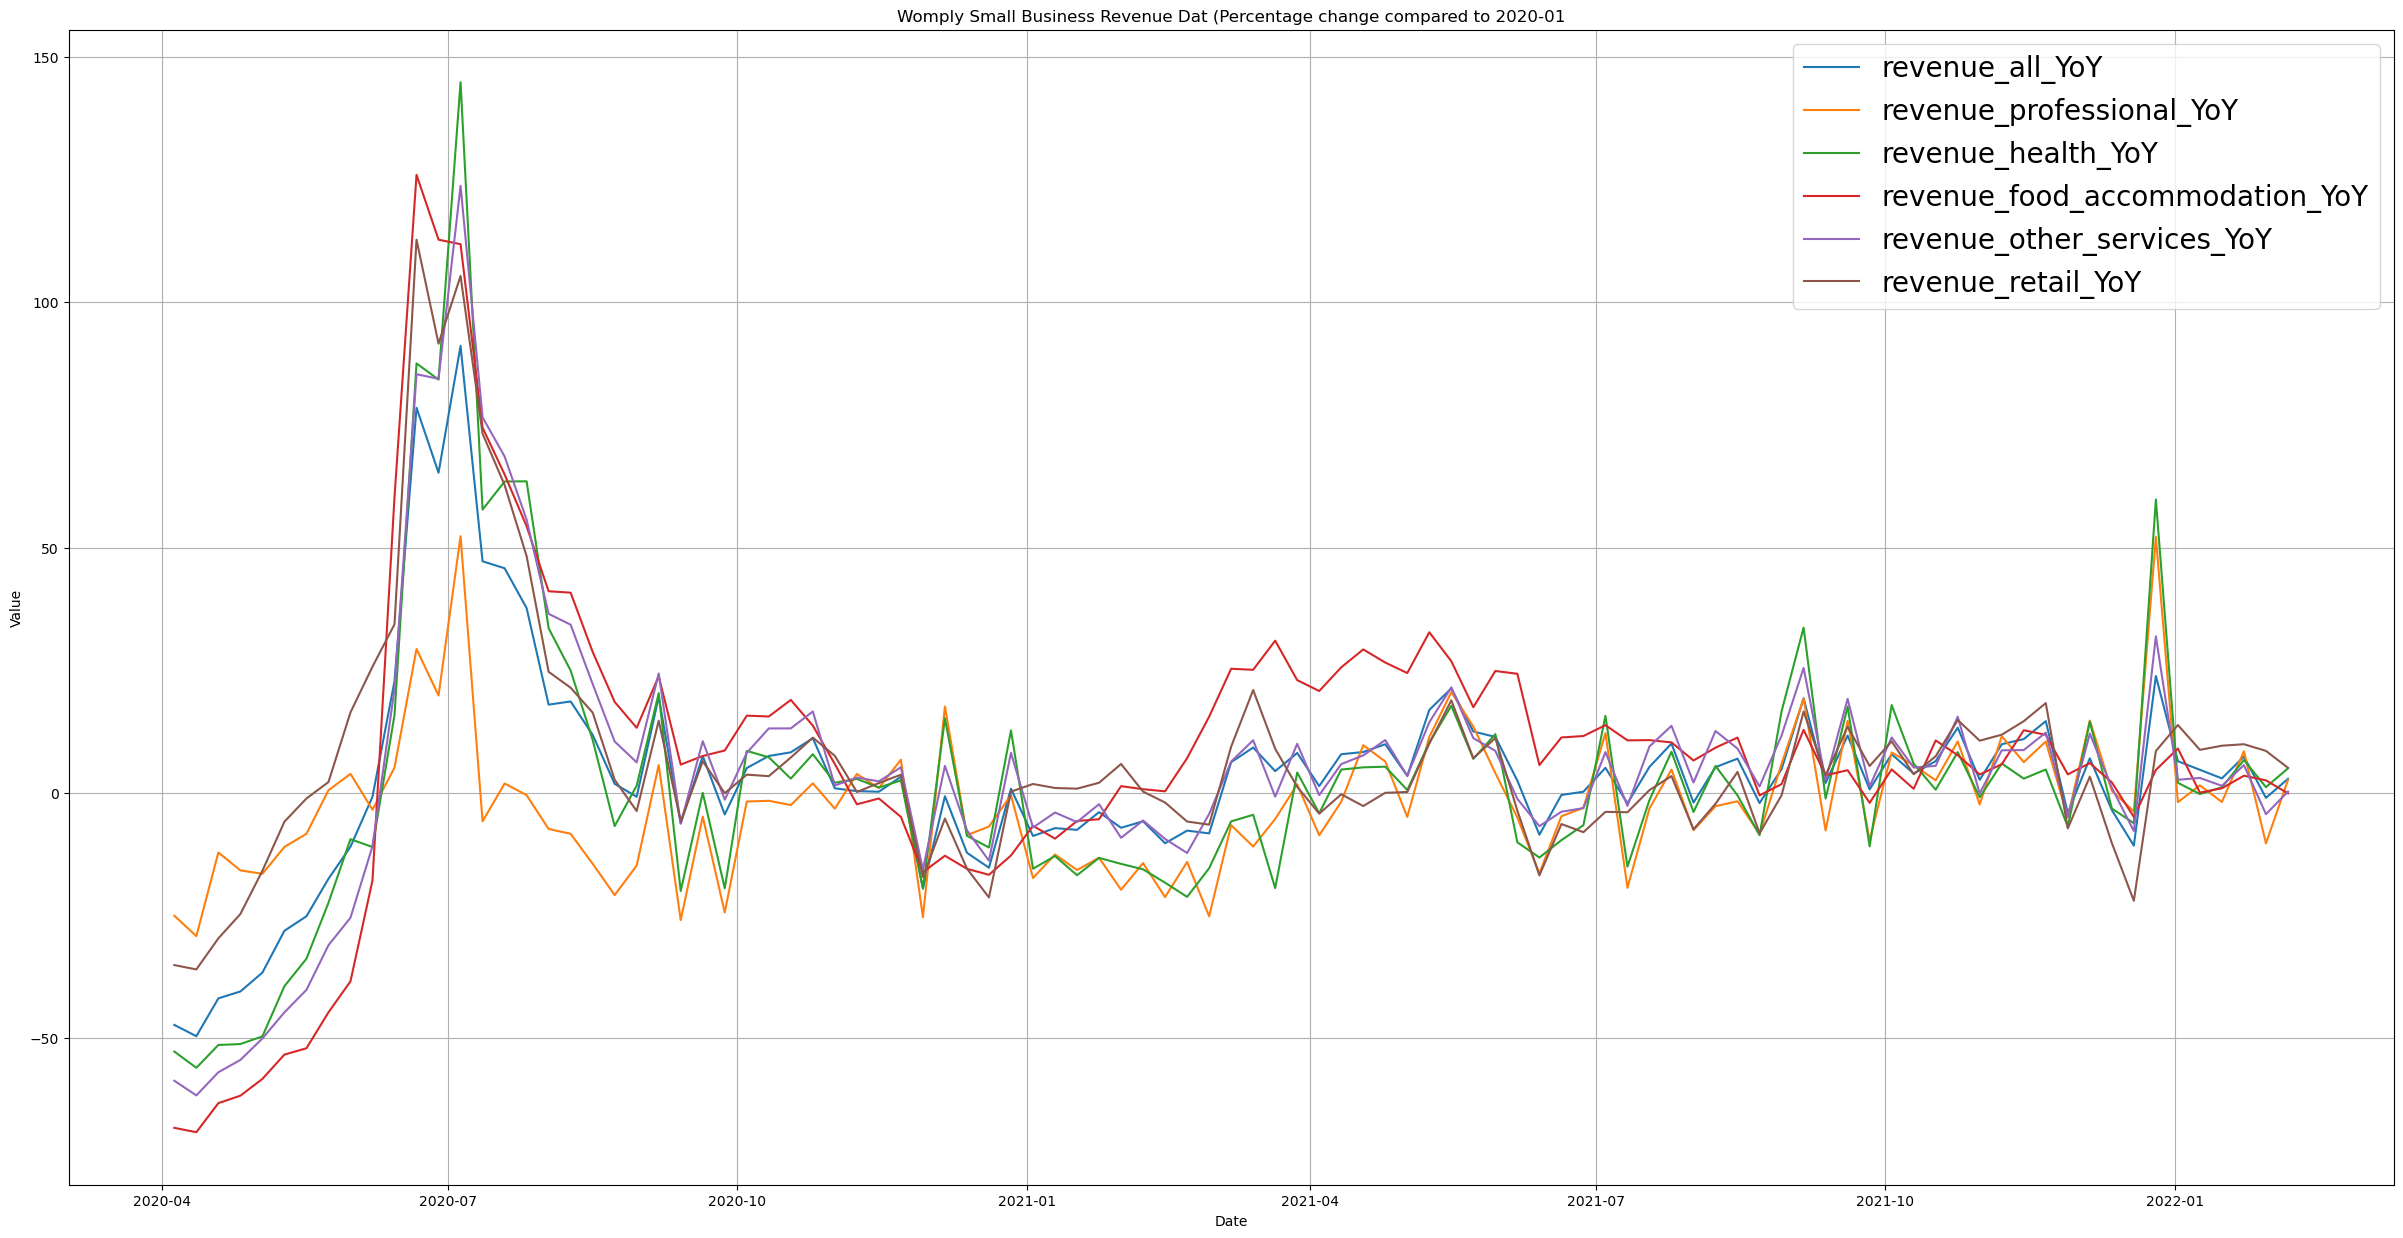

In [26]:
# Assuming df_af_cleaned is your DataFrame and 'Date' is already the index in datetime format

# Create multi-select dropdown
available_metrics = [col for col in df_sbiz_cleaned.columns]
metric_multi_select = widgets.SelectMultiple(options=available_metrics, description='Metrics:', disabled=False)

# Create a button to save the plot
save_button = widgets.Button(description="Save Plot")

# Define plotting function for multiple metrics
def plot_time_series(metrics):
    plt.figure(figsize=(30, 15))
    for metric in metrics:
        plt.plot(df_sbiz_cleaned.index, df_sbiz_cleaned[metric], label=metric)
    # Customize the legend font size
    plt.legend(fontsize=20)
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title('Womply Small Business Revenue Data (Percentage change compared to 2020-01)')
    plt.grid(True)
    plt.show()

# Function to handle button click
def save_plot(b):
    plt.figure(figsize=(30, 15))
    for metric in metric_multi_select.value:
        plt.plot(df_sbiz_cleaned.index, df_sbiz_cleaned[metric], label=metric)
    # Customize the legend font size
    plt.legend(fontsize=20)
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title('Womply Small Business Revenue Dat (Percentage change compared to 2020-01')
    plt.grid(True)
    plt.savefig('time_series_plot.png')

# Bind the button click event to the save function
save_button.on_click(save_plot)

# Interactive plotting
interactive_plot = interactive(plot_time_series, metrics=metric_multi_select)
output = interactive_plot.children[-1]
output.layout.height = '600'

# Combine interactive plot and button into a layout
layout = VBox([interactive_plot, save_button])
layout


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 109 entries, 2020-01-12 to 2022-02-06
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   merchants_all                 109 non-null    float64
 1   revenue_all                   109 non-null    float64
 2   merchants_professional        109 non-null    float64
 3   revenue_professional          109 non-null    float64
 4   merchants_health              109 non-null    float64
 5   revenue_health                109 non-null    float64
 6   merchants_food_accommodation  109 non-null    float64
 7   revenue_food_accommodation    109 non-null    float64
 8   merchants_other_services      109 non-null    float64
 9   revenue_other_services        109 non-null    float64
 10  merchants_retail              109 non-null    float64
 11  revenue_retail                109 non-null    float64
 12  revenue_inclow                109 non-null   

In [33]:
#Choosing the columns we need
df_sbiz_adj = df_sbiz[['year', 'month', 'merchants_all', 'revenue_all']]
df_sbiz_adj.head(20)

,year,month,merchants_all,revenue_all
0,2020,1,0.00934,-0.005230
1,2020,1,-0.00367,0.000584
2,2020,1,-0.00330,0.013900
3,2020,2,-0.00259,-0.001570
4,2020,2,-0.00444,-0.002180
5,2020,2,-0.00514,-0.009290
6,2020,2,-0.00403,-0.009600
7,2020,3,-0.01150,-0.045700
8,2020,3,-0.02090,-0.014500
9,2020,3,-0.02820,-0.129000


### Department of labor

#### Data representation
- Weekly data 

#### Manipulation required:
- Change date representation
- Make Date as index
- Convert object to float

#### Goals: 
- Understand total Unemployment Claim Numbers

In [34]:
#Unemployment cliams data
df_uemc = pd.read_csv('data/UI Claims - National - Weekly.csv')

In [35]:
df_uemc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year                       197 non-null    int64  
 1   month                      197 non-null    int64  
 2   day_endofweek              197 non-null    int64  
 3   initclaims_count_regular   197 non-null    int64  
 4   contclaims_count_regular   197 non-null    int64  
 5   initclaims_count_pua       197 non-null    object 
 6   contclaims_count_peuc      197 non-null    object 
 7   contclaims_count_pua       197 non-null    object 
 8   initclaims_count_combined  197 non-null    object 
 9   contclaims_count_combined  197 non-null    object 
 10  initclaims_rate_regular    197 non-null    float64
 11  contclaims_rate_regular    197 non-null    float64
 12  initclaims_rate_pua        197 non-null    object 
 13  contclaims_rate_peuc       197 non-null    object 

In [36]:
# Assuming df_jp is your DataFrame with 'year', 'month', and 'day_endofweek' columns
df_uemc = df_uemc.rename(columns={'day_endofweek': 'day'})  # Rename the column to 'day'
df_uemc['Date'] = pd.to_datetime(df_uemc[['year', 'month', 'day']])

# Drop the original 'year', 'month', and 'day' columns if needed
df_uemc = df_uemc.drop(['year', 'month', 'day'], axis=1)

# Reset the index
df_uemc_cleaned = df_uemc.reset_index(drop=True)

# Convert the 'Date' column to datetime objects and set it as the index using .loc[]
df_uemc_cleaned.loc[:, 'Date'] = pd.to_datetime(df_uemc_cleaned['Date'])
df_uemc_cleaned.set_index('Date', inplace=True)


In [37]:
# Convert 'object' columns to numeric, replacing non-numeric values with NaN
object_columns = df_uemc_cleaned.select_dtypes(include=['object']).columns
df_uemc_cleaned[object_columns] = df_uemc_cleaned[object_columns].apply(pd.to_numeric, errors='coerce')

In [38]:
df_uemc_cleaned.to_csv('UI_cleaned.csv', index=True)

In [39]:
df_uemc_cleaned = pd.read_csv('UI_cleaned.csv', index_col=0)
if not isinstance(df_uemc_cleaned.index, pd.DatetimeIndex):
    df_uemc_cleaned.index = pd.to_datetime(df_uemc_cleaned.index)

In [40]:
# Assuming df_uemc_cleaned is your DataFrame and 'Date' is already the index in datetime format

# Import the necessary libraries
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interactive, HBox, VBox

# Create multi-select dropdown
available_metrics = [col for col in df_uemc_cleaned.columns]
metric_multi_select = widgets.SelectMultiple(options=available_metrics, description='Metrics:', disabled=False)

# Create a button to save the plot
save_button = widgets.Button(description="Save Plot")

# Define plotting function for multiple metrics
def plot_time_series(metrics):
    plt.figure(figsize=(30, 15))
    for metric in metrics:
        plt.plot(df_uemc_cleaned.index, df_uemc_cleaned[metric], label=metric)
    
    # Customize the legend font size
    plt.legend(fontsize=20)
    
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title('Number of Unemployment Claims Data')
    plt.grid(True)
    plt.show()

# Function to handle button click
def save_plot(b):
    plt.figure(figsize=(30, 15))
    for metric in metric_multi_select.value:
        plt.plot(df_uemc_cleaned.index, df_uemc_cleaned[metric], label=metric)
    
    # Customize the legend font size
    plt.legend(fontsize=20)
    
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title('Number of Unemployment Claims Data')
    plt.grid(True)
    plt.savefig('time_series_plot.png')

# Bind the button click event to the save function
save_button.on_click(save_plot)

# Interactive plotting
interactive_plot = interactive(plot_time_series, metrics=metric_multi_select)
output = interactive_plot.children[-1]
output.layout.height = '600'

# Combine interactive plot and button into a layout
layout = VBox([interactive_plot, save_button])
layout

### Comparisons

In [112]:
# Read 'UNRATE.csv' into df_unrate
df_unrate = pd.read_csv('Other_employment_data/UNRATE_short.csv')

# Read 'NONFARM.csv' into df_nonfarm
df_nonfarm = pd.read_csv('Other_employment_data/NONFARM_short.csv')

df_weight = pd.read_csv('Other_employment_data/Weighted_Job_Openings_Sum.csv')

df_merge = pd.read_csv('Other_employment_data/Merged_cleaned.csv', index_col=0)

In [113]:
df_merge['Average'] = df_merge.mean(axis=1)
df_indeed = df_merge

In [114]:
df_jp_cleaned['Average_values'].head(10)

Date
2020-01-10     99.946800
2020-01-17    100.127600
2020-01-24     99.912700
2020-01-31    100.013000
2020-02-07     99.908820
2020-02-14    100.177160
2020-02-21    100.004034
2020-02-28    100.074520
2020-03-06    100.002668
2020-03-13    100.019366
Name: Average_values, dtype: float64

In [115]:
df_unrate.index = pd.to_datetime(df_unrate['DATE'])
df_nonfarm.index = pd.to_datetime(df_nonfarm['DATE'])
df_weight.index = pd.to_datetime(df_weight['DATE'])
df_merge.index = pd.to_datetime(df_merge.index)
df_nonfarm['PAYEMS/10000'] = df_nonfarm['PAYEMS']/10000
df_indeed['Average/10'] = df_indeed['Average']/10
df_weight['Sum/10'] = df_weight['Sum']/10
df_jp_cleaned['Average_values/10'] = df_jp_cleaned['Average_values']/10

In [129]:
df_uemc_cleaned = df_uemc_cleaned.dropna(subset=['initclaims_rate_combined'])


In [125]:
df_uemc_cleaned.head()

,initclaims_count_regular,contclaims_count_regular,initclaims_count_pua,contclaims_count_peuc,contclaims_count_pua,initclaims_count_combined,contclaims_count_combined,initclaims_rate_regular,contclaims_rate_regular,initclaims_rate_pua,contclaims_rate_peuc,contclaims_rate_pua,initclaims_rate_combined,contclaims_rate_combined,Log_init,Log_cont,ZScore_init,ZScore_cont,Normalized_Average_init,Normalized_Average_cont,Normalized_init,Normalized_cont
Date,,,,,,,,,,,,,,,,,,,,,,
2020-01-04,333862,2124746,0.0,0.0,0.0,333862.0,2124746.0,0.205,1.30,0.0,0.0,0.0,0.205,1.30,-1.584745,0.262364,NaN,NaN,0.030759,0.027874,0.030759,0.027874
2020-01-11,336451,2231589,0.0,0.0,0.0,336451.0,2231589.0,0.206,1.37,0.0,0.0,0.0,0.206,1.37,-1.579879,0.314811,NaN,NaN,0.031032,0.031346,0.031032,0.031346
2020-01-18,277748,2116200,0.0,0.0,0.0,277748.0,2116200.0,0.170,1.30,0.0,0.0,0.0,0.170,1.30,-1.771957,0.262364,NaN,NaN,0.021189,0.027874,0.021189,0.027874
2020-01-25,225390,2055963,0.0,0.0,0.0,225390.0,2055963.0,0.138,1.26,0.0,0.0,0.0,0.138,1.26,-1.980502,0.231112,NaN,NaN,0.012440,0.025890,0.012440,0.025890
2020-02-01,222049,2126523,0.0,0.0,0.0,222049.0,2126523.0,0.136,1.30,0.0,0.0,0.0,0.136,1.30,-1.995100,0.262364,NaN,NaN,0.011893,0.027874,0.011893,0.027874


In [130]:
print(df_uemc_cleaned['initclaims_rate_combined'].std())
print(df_uemc_cleaned['initclaims_rate_combined'].isna().sum())



0.613313234075155
0


In [131]:
import pandas as pd
import numpy as np

# Log Transformation
df_nonfarm['Log_PAYEMS'] = np.log(df_nonfarm['PAYEMS/10000'])
df_unrate['Log_UNRATE'] = np.log(df_unrate['UNRATE'])
df_indeed['Log_Average'] = np.log(df_indeed['Average/10'])
df_weight['Log_weight'] = np.log(df_weight['Sum/10'])
df_jp_cleaned['Log_weight'] = np.log(df_jp_cleaned['Average_values/10'])
df_uemc_cleaned['Log_init'] = np.log(df_uemc_cleaned['initclaims_rate_combined'])
df_uemc_cleaned['Log_cont'] = np.log(df_uemc_cleaned['contclaims_rate_combined'])


from scipy.stats import zscore

# Z-Score Transformation
df_nonfarm['ZScore_PAYEMS'] = zscore(df_nonfarm['PAYEMS/10000'])
df_unrate['ZScore_UNRATE'] = zscore(df_unrate['UNRATE'])
df_indeed['ZScore_Average'] = zscore(df_indeed['Average/10'])
df_weight['ZScore_Weight'] = zscore(df_weight['Sum/10'])
df_jp_cleaned['ZScore_weight'] = zscore(df_jp_cleaned['Average_values/10'])
df_uemc_cleaned['ZScore_init'] = zscore(df_uemc_cleaned['initclaims_rate_combined'])
df_uemc_cleaned['ZScore_cont'] = zscore(df_uemc_cleaned['contclaims_rate_combined'])

from sklearn.preprocessing import MinMaxScaler

# Min-Max Normalization
scaler = MinMaxScaler()

# Fit and transform on PAYEMS/10000 column
df_nonfarm['Normalized_PAYEMS'] = scaler.fit_transform(df_nonfarm[['PAYEMS/10000']])
# Fit and transform on UNRATE column
df_unrate['Normalized_UNRATE'] = scaler.fit_transform(df_unrate[['UNRATE']])
# Fit and transform on Average/10 column
df_indeed['Normalized_Average'] = scaler.fit_transform(df_indeed[['Average/10']])
# Fit and transform on Average/10 column
df_weight['Normalized_Weight'] = scaler.fit_transform(df_weight[['Sum/10']])
# Fit and transform on Average/10 column
df_jp_cleaned['Normalized_Average_jp'] = scaler.fit_transform(df_jp_cleaned[['Average_values/10']])
# Fit and transform on Average/10 column
df_uemc_cleaned['Normalized_init'] = scaler.fit_transform(df_uemc_cleaned[['initclaims_rate_combined']])
# Fit and transform on Average/10 column
df_uemc_cleaned['Normalized_cont'] = scaler.fit_transform(df_uemc_cleaned[['contclaims_rate_combined']])

In [132]:
df_uemc_cleaned.head()

,initclaims_count_regular,contclaims_count_regular,initclaims_count_pua,contclaims_count_peuc,contclaims_count_pua,initclaims_count_combined,contclaims_count_combined,initclaims_rate_regular,contclaims_rate_regular,initclaims_rate_pua,contclaims_rate_peuc,contclaims_rate_pua,initclaims_rate_combined,contclaims_rate_combined,Log_init,Log_cont,ZScore_init,ZScore_cont,Normalized_Average_init,Normalized_Average_cont,Normalized_init,Normalized_cont
Date,,,,,,,,,,,,,,,,,,,,,,
2020-01-04,333862,2124746,0.0,0.0,0.0,333862.0,2124746.0,0.205,1.30,0.0,0.0,0.0,0.205,1.30,-1.584745,0.262364,-0.399875,-0.683757,0.030759,0.027874,0.030759,0.027874
2020-01-11,336451,2231589,0.0,0.0,0.0,336451.0,2231589.0,0.206,1.37,0.0,0.0,0.0,0.206,1.37,-1.579879,0.314811,-0.398240,-0.672128,0.031032,0.031346,0.031032,0.031346
2020-01-18,277748,2116200,0.0,0.0,0.0,277748.0,2116200.0,0.170,1.30,0.0,0.0,0.0,0.170,1.30,-1.771957,0.262364,-0.457089,-0.683757,0.021189,0.027874,0.021189,0.027874
2020-01-25,225390,2055963,0.0,0.0,0.0,225390.0,2055963.0,0.138,1.26,0.0,0.0,0.0,0.138,1.26,-1.980502,0.231112,-0.509399,-0.690403,0.012440,0.025890,0.012440,0.025890
2020-02-01,222049,2126523,0.0,0.0,0.0,222049.0,2126523.0,0.136,1.30,0.0,0.0,0.0,0.136,1.30,-1.995100,0.262364,-0.512668,-0.683757,0.011893,0.027874,0.011893,0.027874


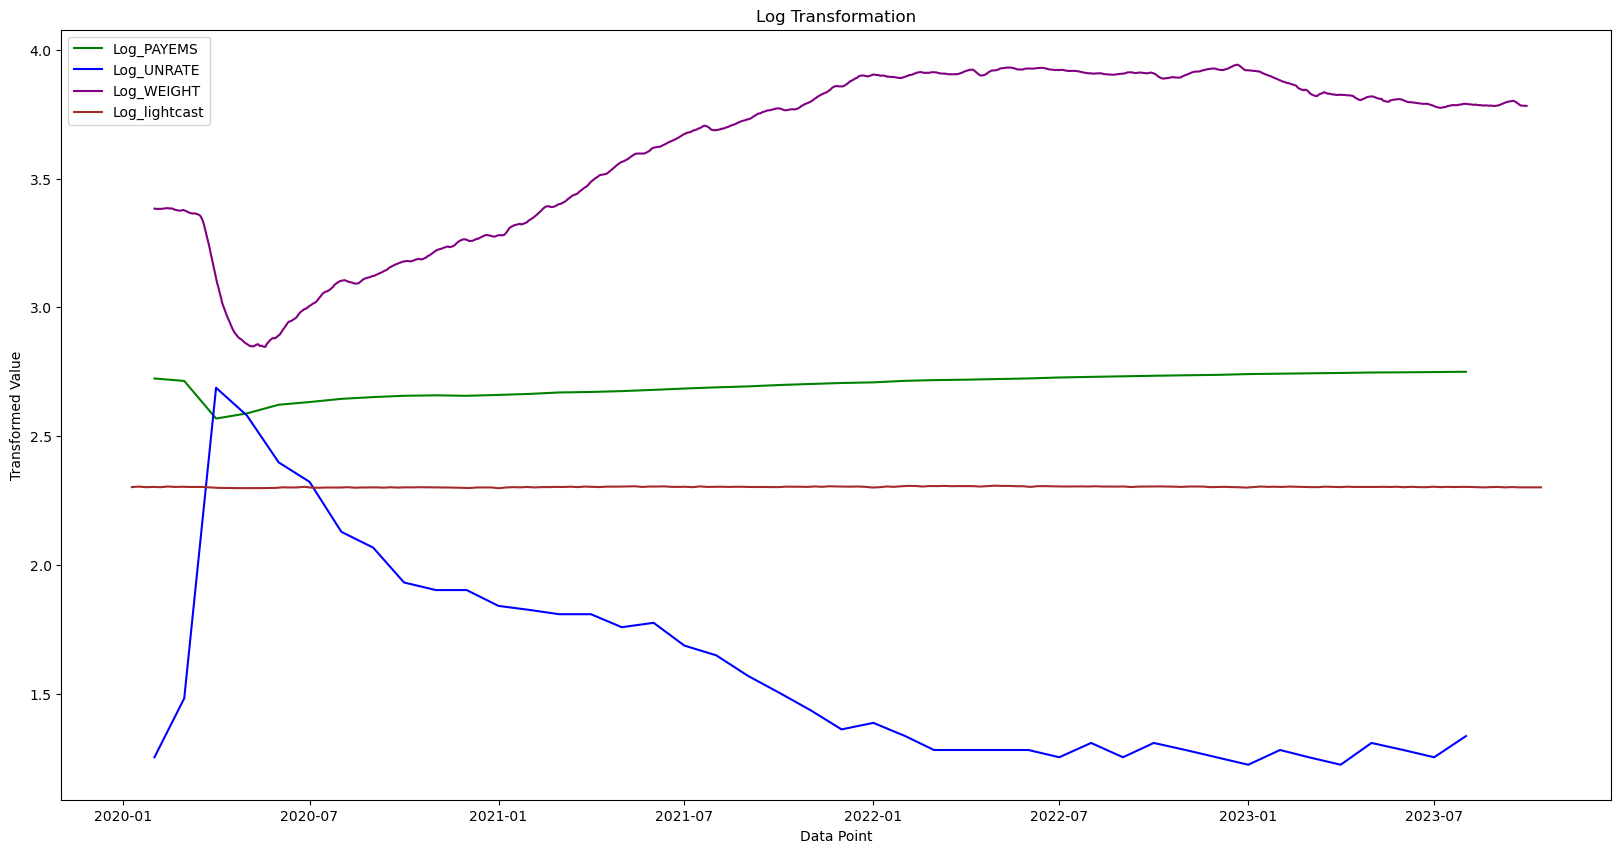

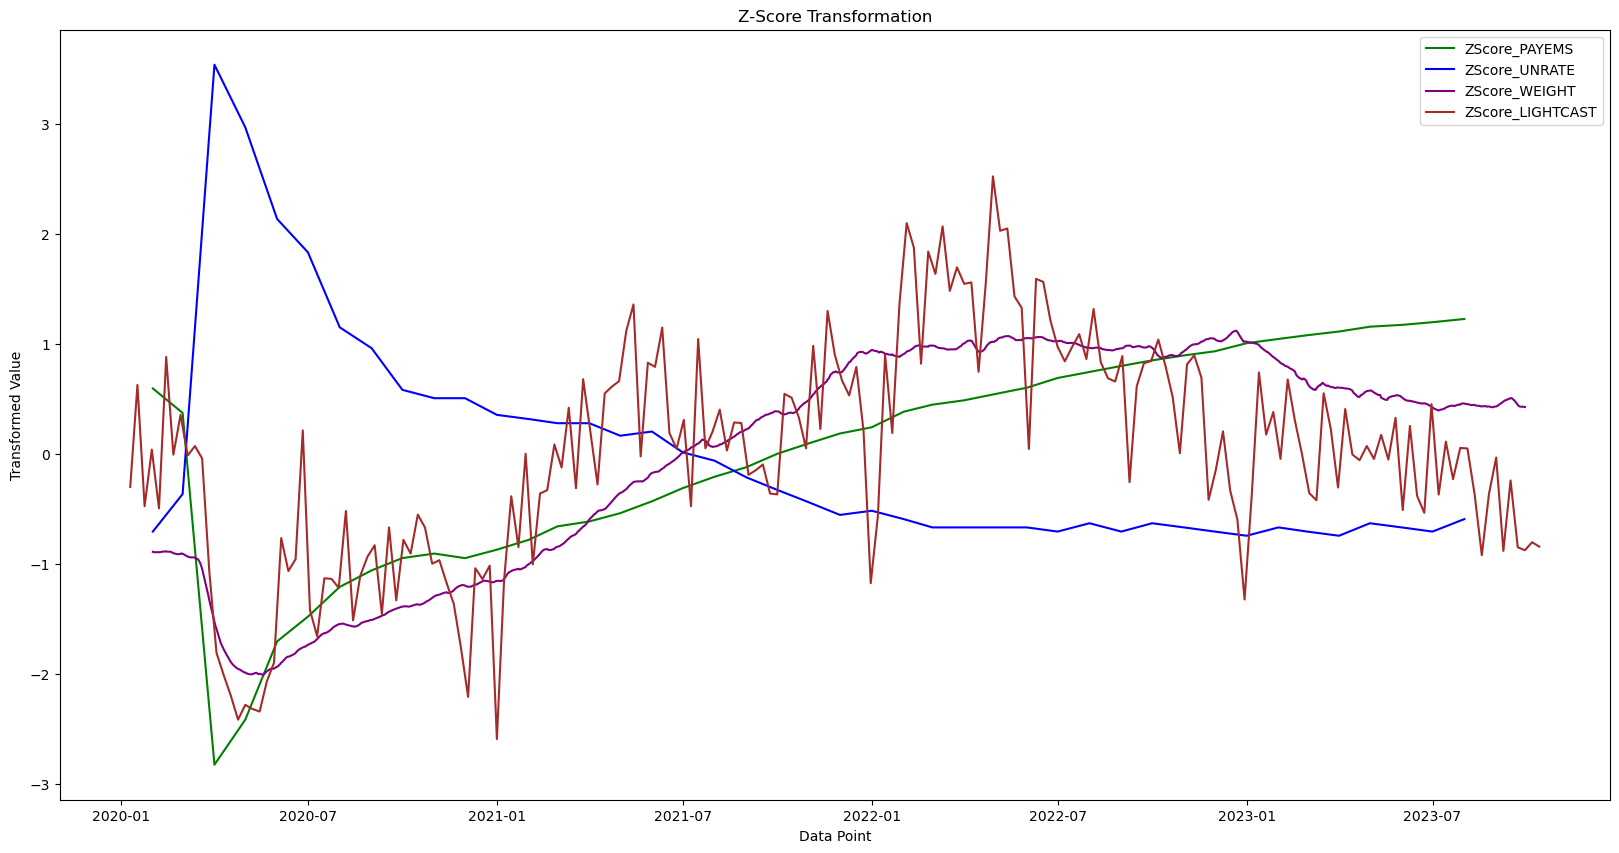

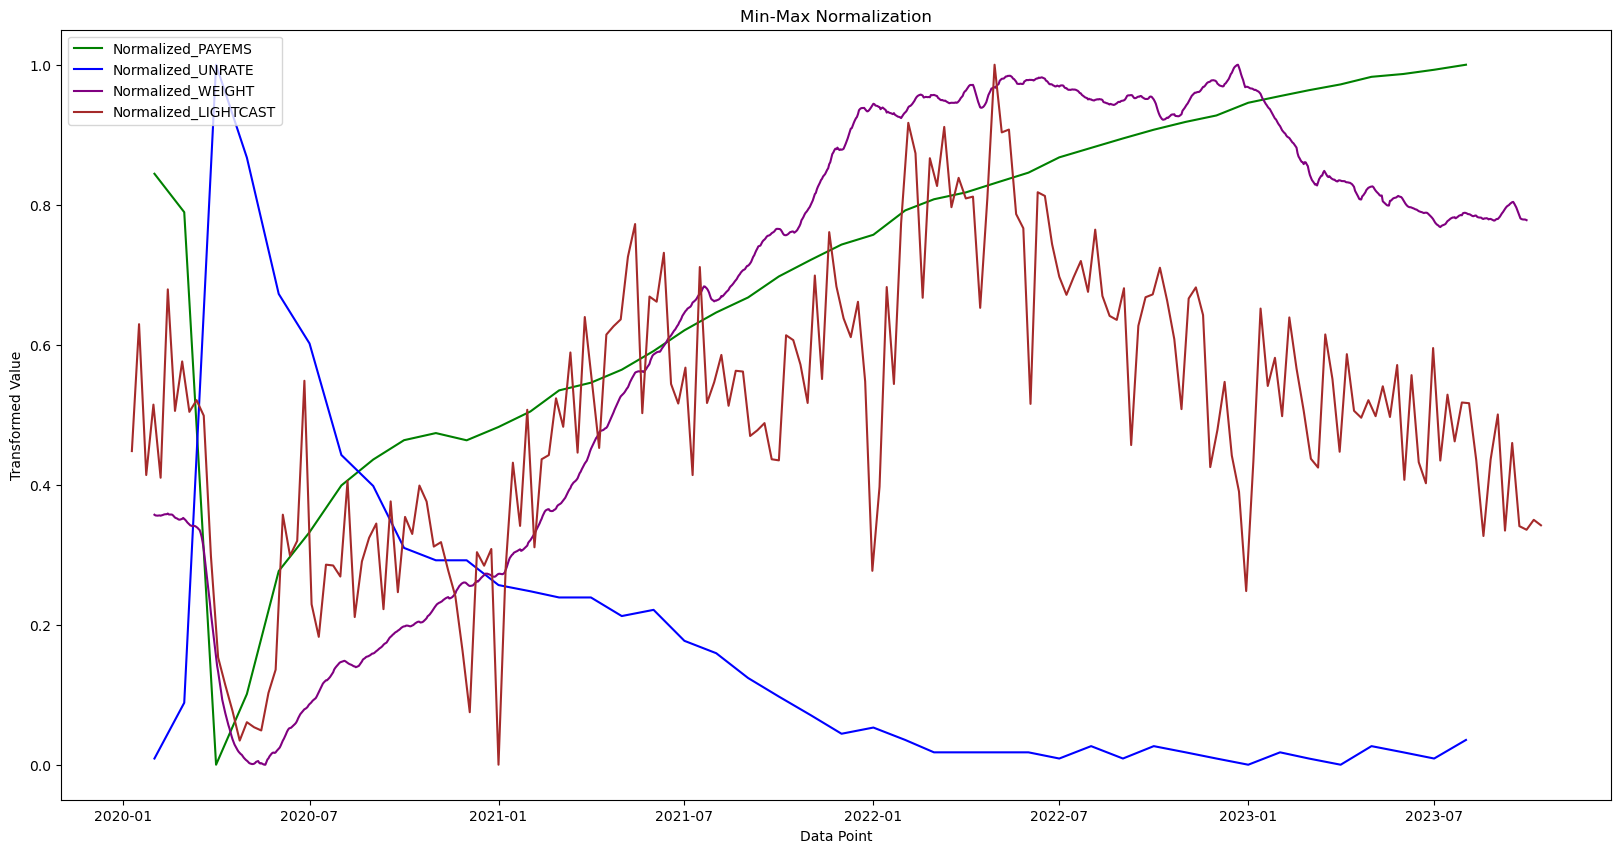

In [138]:
import matplotlib.pyplot as plt

# Create a figure for the Log Transformation
plt.figure(figsize=(20, 10))
plt.plot(df_nonfarm.index, df_nonfarm['Log_PAYEMS'], label='Log_PAYEMS', color='green')
plt.plot(df_unrate.index, df_unrate['Log_UNRATE'], label='Log_UNRATE', color='blue')
#plt.plot(df_indeed.index, df_indeed['Log_Average'], label='Log_INDEED', color='red')
plt.plot(df_weight.index, df_weight['Log_weight'], label='Log_WEIGHT', color='purple')
plt.plot(df_jp_cleaned.index, df_jp_cleaned['Log_weight'], label='Log_lightcast', color='brown')
#plt.plot(df_uemc_cleaned.index, df_uemc_cleaned['Log_init'], label='Log_INIT', color='red')
#plt.plot(df_uemc_cleaned.index, df_uemc_cleaned['Log_cont'], label='Log_CONT', color='purple')


plt.title('Log Transformation')
plt.xlabel('Data Point')
plt.ylabel('Transformed Value')
plt.legend()
plt.show()

# Create a figure for the Z-Score Transformation
plt.figure(figsize=(20, 10))
plt.plot(df_nonfarm.index, df_nonfarm['ZScore_PAYEMS'], label='ZScore_PAYEMS', color='green')
plt.plot(df_unrate.index, df_unrate['ZScore_UNRATE'], label='ZScore_UNRATE', color='blue')
#plt.plot(df_indeed.index, df_indeed['ZScore_Average'], label='ZScore_INDEED', color='red')
plt.plot(df_weight.index, df_weight['ZScore_Weight'], label='ZScore_WEIGHT', color='purple')
plt.plot(df_jp_cleaned.index, df_jp_cleaned['ZScore_weight'], label='ZScore_LIGHTCAST', color='brown')
#plt.plot(df_uemc_cleaned.index, df_uemc_cleaned['ZScore_init'], label='ZScore_INIT', color='red')
#plt.plot(df_uemc_cleaned.index, df_uemc_cleaned['ZScore_cont'], label='ZScore_CONT', color='purple')


plt.title('Z-Score Transformation')
plt.xlabel('Data Point')
plt.ylabel('Transformed Value')
plt.legend()
plt.show()

# Create a figure for the Min-Max Normalization
plt.figure(figsize=(20, 10))
plt.plot(df_nonfarm.index, df_nonfarm['Normalized_PAYEMS'], label='Normalized_PAYEMS', color='green')
plt.plot(df_unrate.index, df_unrate['Normalized_UNRATE'], label='Normalized_UNRATE', color='blue')
#plt.plot(df_indeed.index, df_indeed['Normalized_Average'], label='Normalized_INDEED', color='red')
plt.plot(df_weight.index, df_weight['Normalized_Weight'], label='Normalized_WEIGHT', color='purple')
plt.plot(df_jp_cleaned.index, df_jp_cleaned['Normalized_Average_jp'], label='Normalized_LIGHTCAST', color='brown')
#plt.plot(df_uemc_cleaned.index, df_uemc_cleaned['Normalized_init'], label='Normalized_INIT', color='red')
#plt.plot(df_uemc_cleaned.index, df_uemc_cleaned['Normalized_cont'], label='Normalized_CONT', color='purple')


plt.title('Min-Max Normalization')
plt.xlabel('Data Point')
plt.ylabel('Transformed Value')
plt.legend()
plt.show()


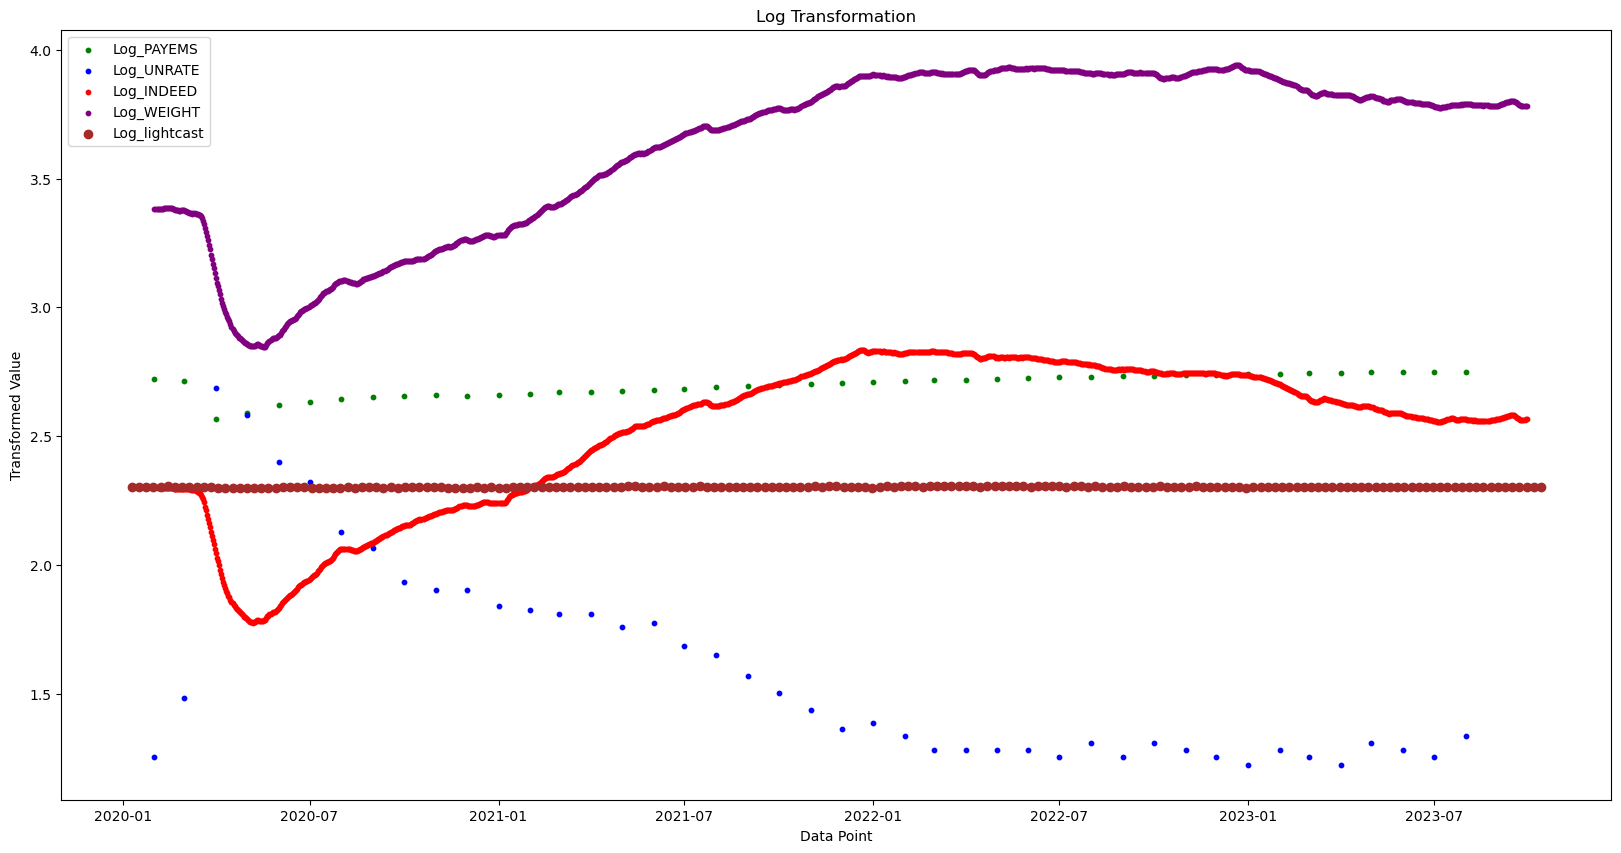

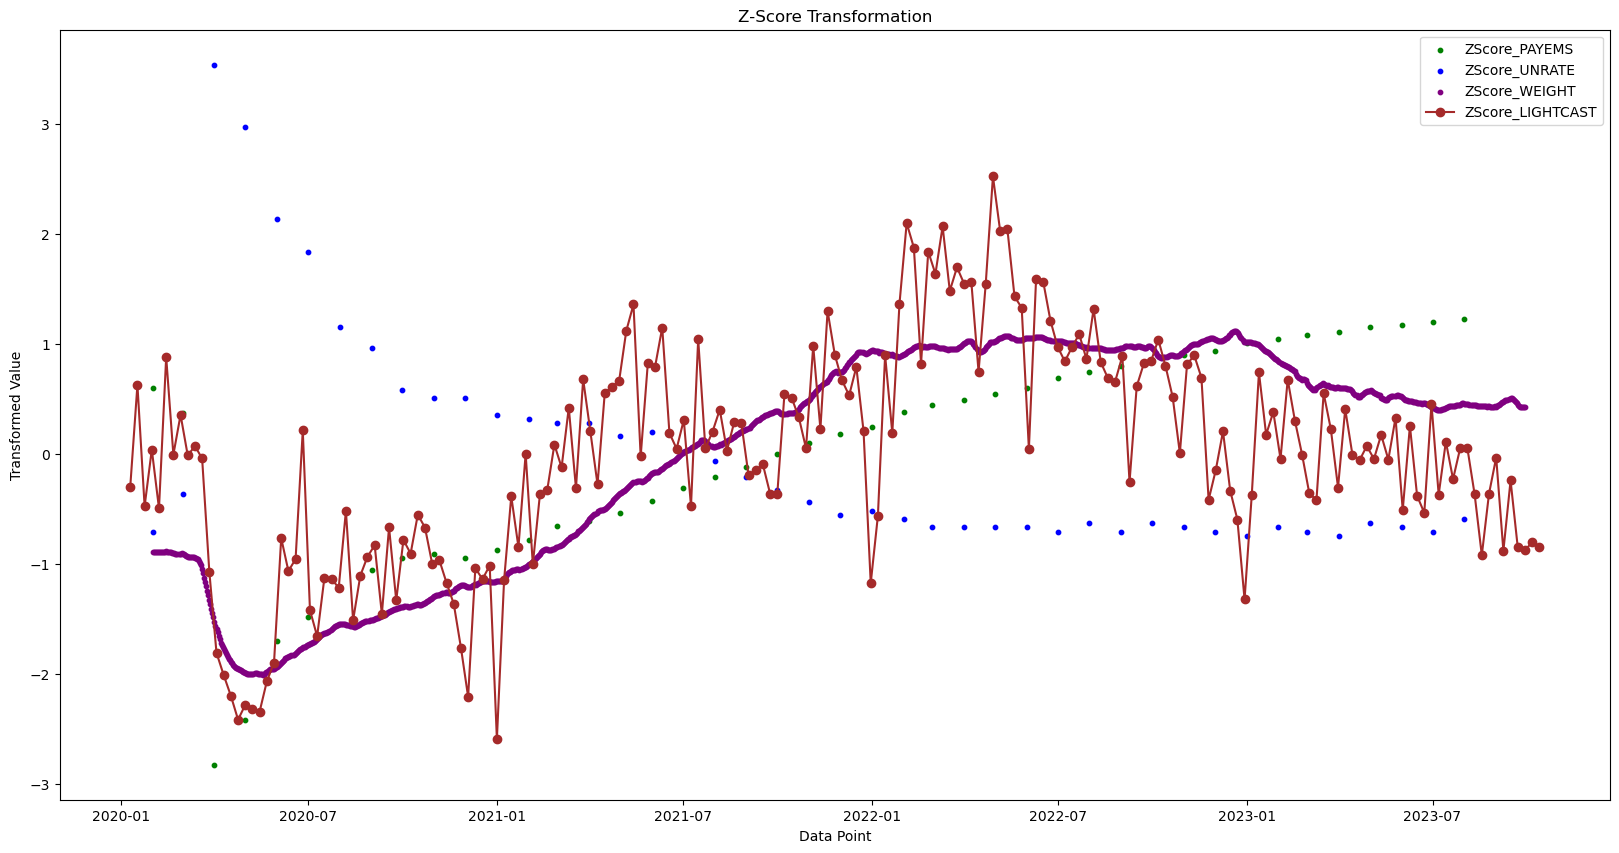

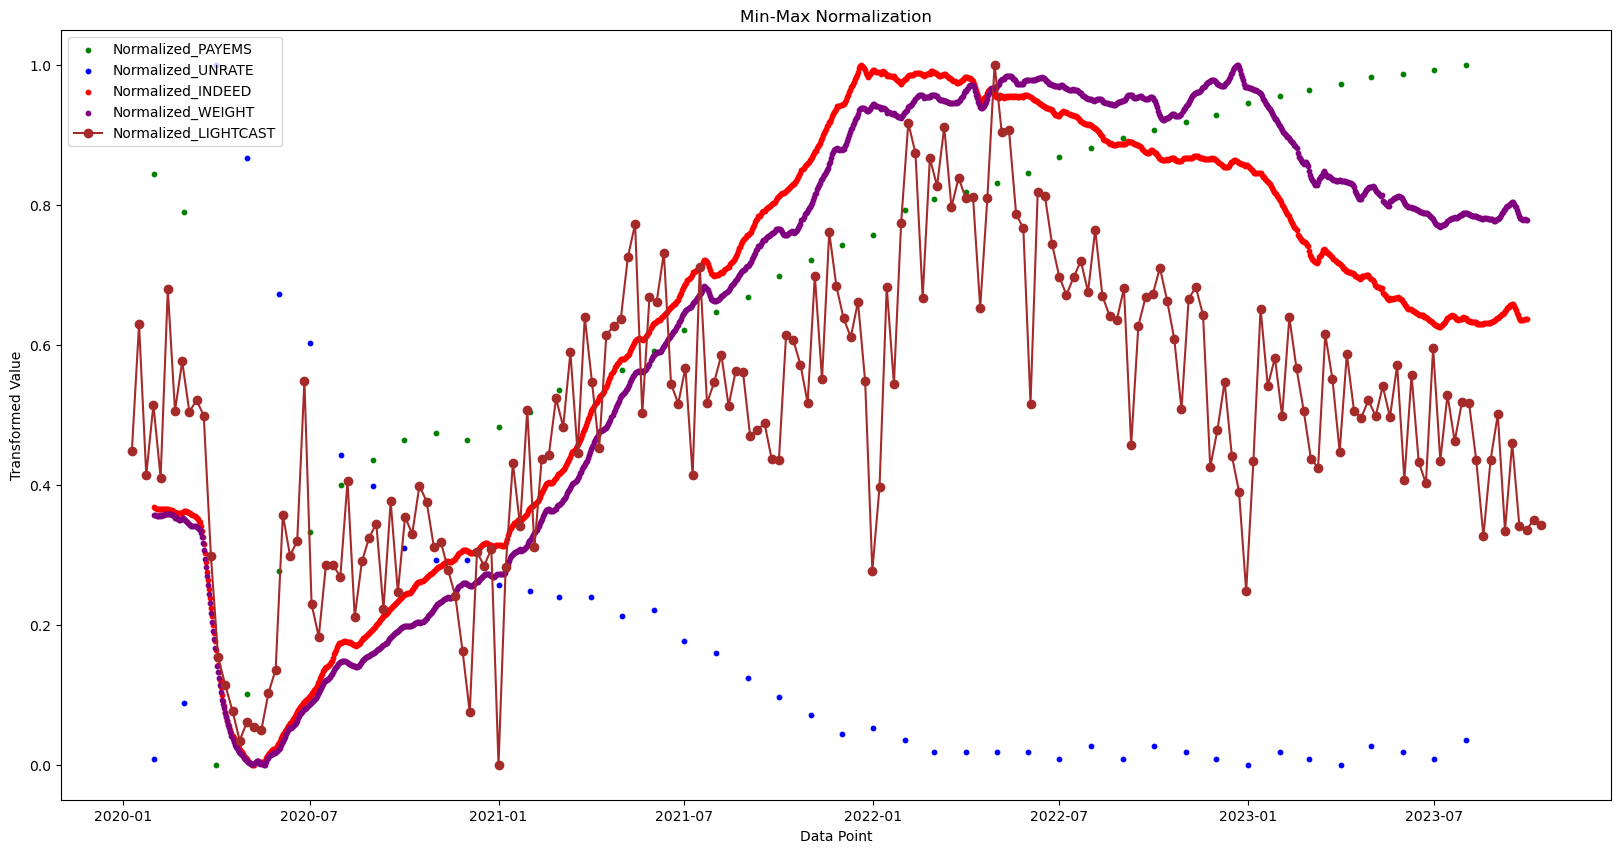

In [139]:
import matplotlib.pyplot as plt

# Create a figure for the Log Transformation
plt.figure(figsize=(20, 10))
plt.scatter(df_nonfarm.index, df_nonfarm['Log_PAYEMS'], label='Log_PAYEMS', color='green', marker='o', s=10)
plt.scatter(df_unrate.index, df_unrate['Log_UNRATE'], label='Log_UNRATE', color='blue', marker='o', s=10)
plt.scatter(df_indeed.index, df_indeed['Log_Average'], label='Log_INDEED', color='red', marker='o', s=10)
plt.scatter(df_weight.index, df_weight['Log_weight'], label='Log_WEIGHT', color='purple', marker='o', s=10)
plt.scatter(df_jp_cleaned.index, df_jp_cleaned['Log_weight'], label='Log_lightcast', color='brown', marker='o')


plt.title('Log Transformation')
plt.xlabel('Data Point')
plt.ylabel('Transformed Value')
plt.legend()
plt.show()

# Create a figure for the Z-Score Transformation
plt.figure(figsize=(20, 10))
plt.scatter(df_nonfarm.index, df_nonfarm['ZScore_PAYEMS'], label='ZScore_PAYEMS', color='green', marker='o', s=10)
plt.scatter(df_unrate.index, df_unrate['ZScore_UNRATE'], label='ZScore_UNRATE', color='blue', marker='o', s=10)
#plt.scatter(df_indeed.index, df_indeed['ZScore_Average'], label='ZScore_INDEED', color='red', marker='o', s=10)
plt.scatter(df_weight.index, df_weight['ZScore_Weight'], label='ZScore_WEIGHT', color='purple', marker='o', s=10)
plt.plot(df_jp_cleaned.index, df_jp_cleaned['ZScore_weight'], label='ZScore_LIGHTCAST', color='brown', marker='o')


plt.title('Z-Score Transformation')
plt.xlabel('Data Point')
plt.ylabel('Transformed Value')
plt.legend()
plt.show()

# Create a figure for the Min-Max Normalization
plt.figure(figsize=(20, 10))
plt.scatter(df_nonfarm.index, df_nonfarm['Normalized_PAYEMS'], label='Normalized_PAYEMS', color='green', marker='o', s=10)
plt.scatter(df_unrate.index, df_unrate['Normalized_UNRATE'], label='Normalized_UNRATE', color='blue', marker='o', s=10)
plt.scatter(df_indeed.index, df_indeed['Normalized_Average'], label='Normalized_INDEED', color='red', marker='o', s=10)
plt.scatter(df_weight.index, df_weight['Normalized_Weight'], label='Normalized_WEIGHT', color='purple', marker='o', s=10)
plt.plot(df_jp_cleaned.index, df_jp_cleaned['Normalized_Average_jp'], label='Normalized_LIGHTCAST', color='brown', marker='o')


plt.title('Min-Max Normalization')
plt.xlabel('Data Point')
plt.ylabel('Transformed Value')
plt.legend()
plt.show()


### Job Openings Comparison

#### Non-farm Opneings

In [141]:
df_nfo = pd.read_csv('Non_farm_openings.csv', index_col=0)
'''if not isinstance(df_jp_cleaned.index, pd.DatetimeIndex):
        df_jp_cleaned.index = pd.to_datetime(df_jp_cleaned.index)'''

'if not isinstance(df_jp_cleaned.index, pd.DatetimeIndex):\n        df_jp_cleaned.index = pd.to_datetime(df_jp_cleaned.index)'

In [144]:
df_nfo.index = pd.to_datetime(df_nfo.index)
df_nfo_cleaned = df_nfo[df_nfo.index >= '2020-02-01']

In [146]:
df_nfo_cleaned = df_nfo_cleaned.rename(columns={'JTSJOL': 'Nonfarm_openings'})  # Rename the column to 'day'

In [ ]:
df_merge['Average'], df_jp_cleaned

In [162]:
def add_yoy_column(df, column_name):
    """
    Add a Year-over-Year (YoY) change column to the original DataFrame.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    column_name (str): The column for which to calculate the YoY change.
    """
    df[f"{column_name}_YoY"] = df[column_name] / df[column_name].shift(12) - 1

# Add YoY change for the 'Value' column to the original DataFrame
add_yoy_column(df_nfo_cleaned, 'Nonfarm_openings')
print(df_nfo_cleaned['Nonfarm_openings_YoY']) 


DATE
2020-02-01         NaN
2020-03-01         NaN
2020-04-01         NaN
2020-05-01         NaN
2020-06-01         NaN
2020-07-01         NaN
2020-08-01         NaN
2020-09-01         NaN
2020-10-01         NaN
2020-11-01         NaN
2020-12-01         NaN
2021-01-01         NaN
2021-02-01    0.109364
2021-03-01    0.449603
2021-04-01    0.982074
2021-05-01    0.763125
2021-06-01    0.645530
2021-07-01    0.670556
2021-08-01    0.723270
2021-09-01    0.671069
2021-10-01    0.666862
2021-11-01    0.633745
2021-12-01    0.725416
2022-01-01    0.600976
2022-02-01    0.494974
2022-03-01    0.431956
2022-04-01    0.265612
2022-05-01    0.162907
2022-06-01    0.088589
2022-07-01    0.045764
2022-08-01   -0.069526
2022-09-01   -0.002573
2022-10-01   -0.078906
2022-11-01   -0.043269
2022-12-01   -0.050059
2023-01-01   -0.080439
2023-02-01   -0.140247
2023-03-01   -0.189740
2023-04-01   -0.122076
2023-05-01   -0.159661
2023-06-01   -0.163854
2023-07-01   -0.216169
2023-08-01   -0.057658
Name: 

In [161]:
# Add YoY change for the 'Value' column to the original DataFrame
add_yoy_column(df_merge, 'Average')
print(df_merge['Average_YoY']) 

DATE
2020-02-01         NaN
2020-02-02         NaN
2020-02-03         NaN
2020-02-04         NaN
2020-02-05         NaN
2020-02-06         NaN
2020-02-07         NaN
2020-02-08         NaN
2020-02-09         NaN
2020-02-10         NaN
2020-02-11         NaN
2020-02-12         NaN
2020-02-13   -0.002600
2020-02-14   -0.001282
2020-02-15   -0.001749
2020-02-16   -0.001377
2020-02-17   -0.001824
2020-02-18   -0.002297
2020-02-19   -0.002759
2020-02-20   -0.004133
2020-02-21   -0.004997
2020-02-22   -0.006301
2020-02-23   -0.006635
2020-02-24   -0.007107
2020-02-25   -0.007031
2020-02-26   -0.006960
2020-02-27   -0.005241
2020-02-28   -0.004528
2020-02-29   -0.002230
2020-03-01   -0.001702
2020-03-02   -0.000453
2020-03-03    0.000464
2020-03-04    0.000846
2020-03-05    0.001002
2020-03-06    0.000276
2020-03-07   -0.000222
2020-03-08   -0.000856
2020-03-09   -0.002899
2020-03-10   -0.004097
2020-03-11   -0.005162
2020-03-12   -0.007999
2020-03-13   -0.010108
2020-03-14   -0.012529
2020-0

In [160]:
# Add YoY change for the 'Value' column to the original DataFrame
add_yoy_column(df_jp_cleaned, 'Average_values')
print(df_jp_cleaned['Average_values_YoY']) 

Date
2020-01-10         NaN
2020-01-17         NaN
2020-01-24         NaN
2020-01-31         NaN
2020-02-07         NaN
2020-02-14         NaN
2020-02-21         NaN
2020-02-28         NaN
2020-03-06         NaN
2020-03-13         NaN
2020-03-20         NaN
2020-03-27         NaN
2020-04-03   -0.002942
2020-04-10   -0.005135
2020-04-17   -0.003364
2020-04-24   -0.004785
2020-05-01   -0.003485
2020-05-08   -0.006227
2020-05-15   -0.004552
2020-05-22   -0.004720
2020-05-29   -0.003673
2020-06-05   -0.001631
2020-06-12   -0.001995
2020-06-19    0.000221
2020-06-26    0.003955
2020-07-03    0.001156
2020-07-10    0.001060
2020-07-17    0.002518
2020-07-24    0.002242
2020-07-31    0.002157
2020-08-07    0.003571
2020-08-14    0.001086
2020-08-21    0.001547
2020-08-28   -0.000330
2020-09-04    0.000459
2020-09-11   -0.000975
2020-09-18   -0.001717
2020-09-25    0.000172
2020-10-02    0.001714
2020-10-09    0.000438
2020-10-16    0.001141
2020-10-23    0.001071
2020-10-30   -0.000936
2020-1

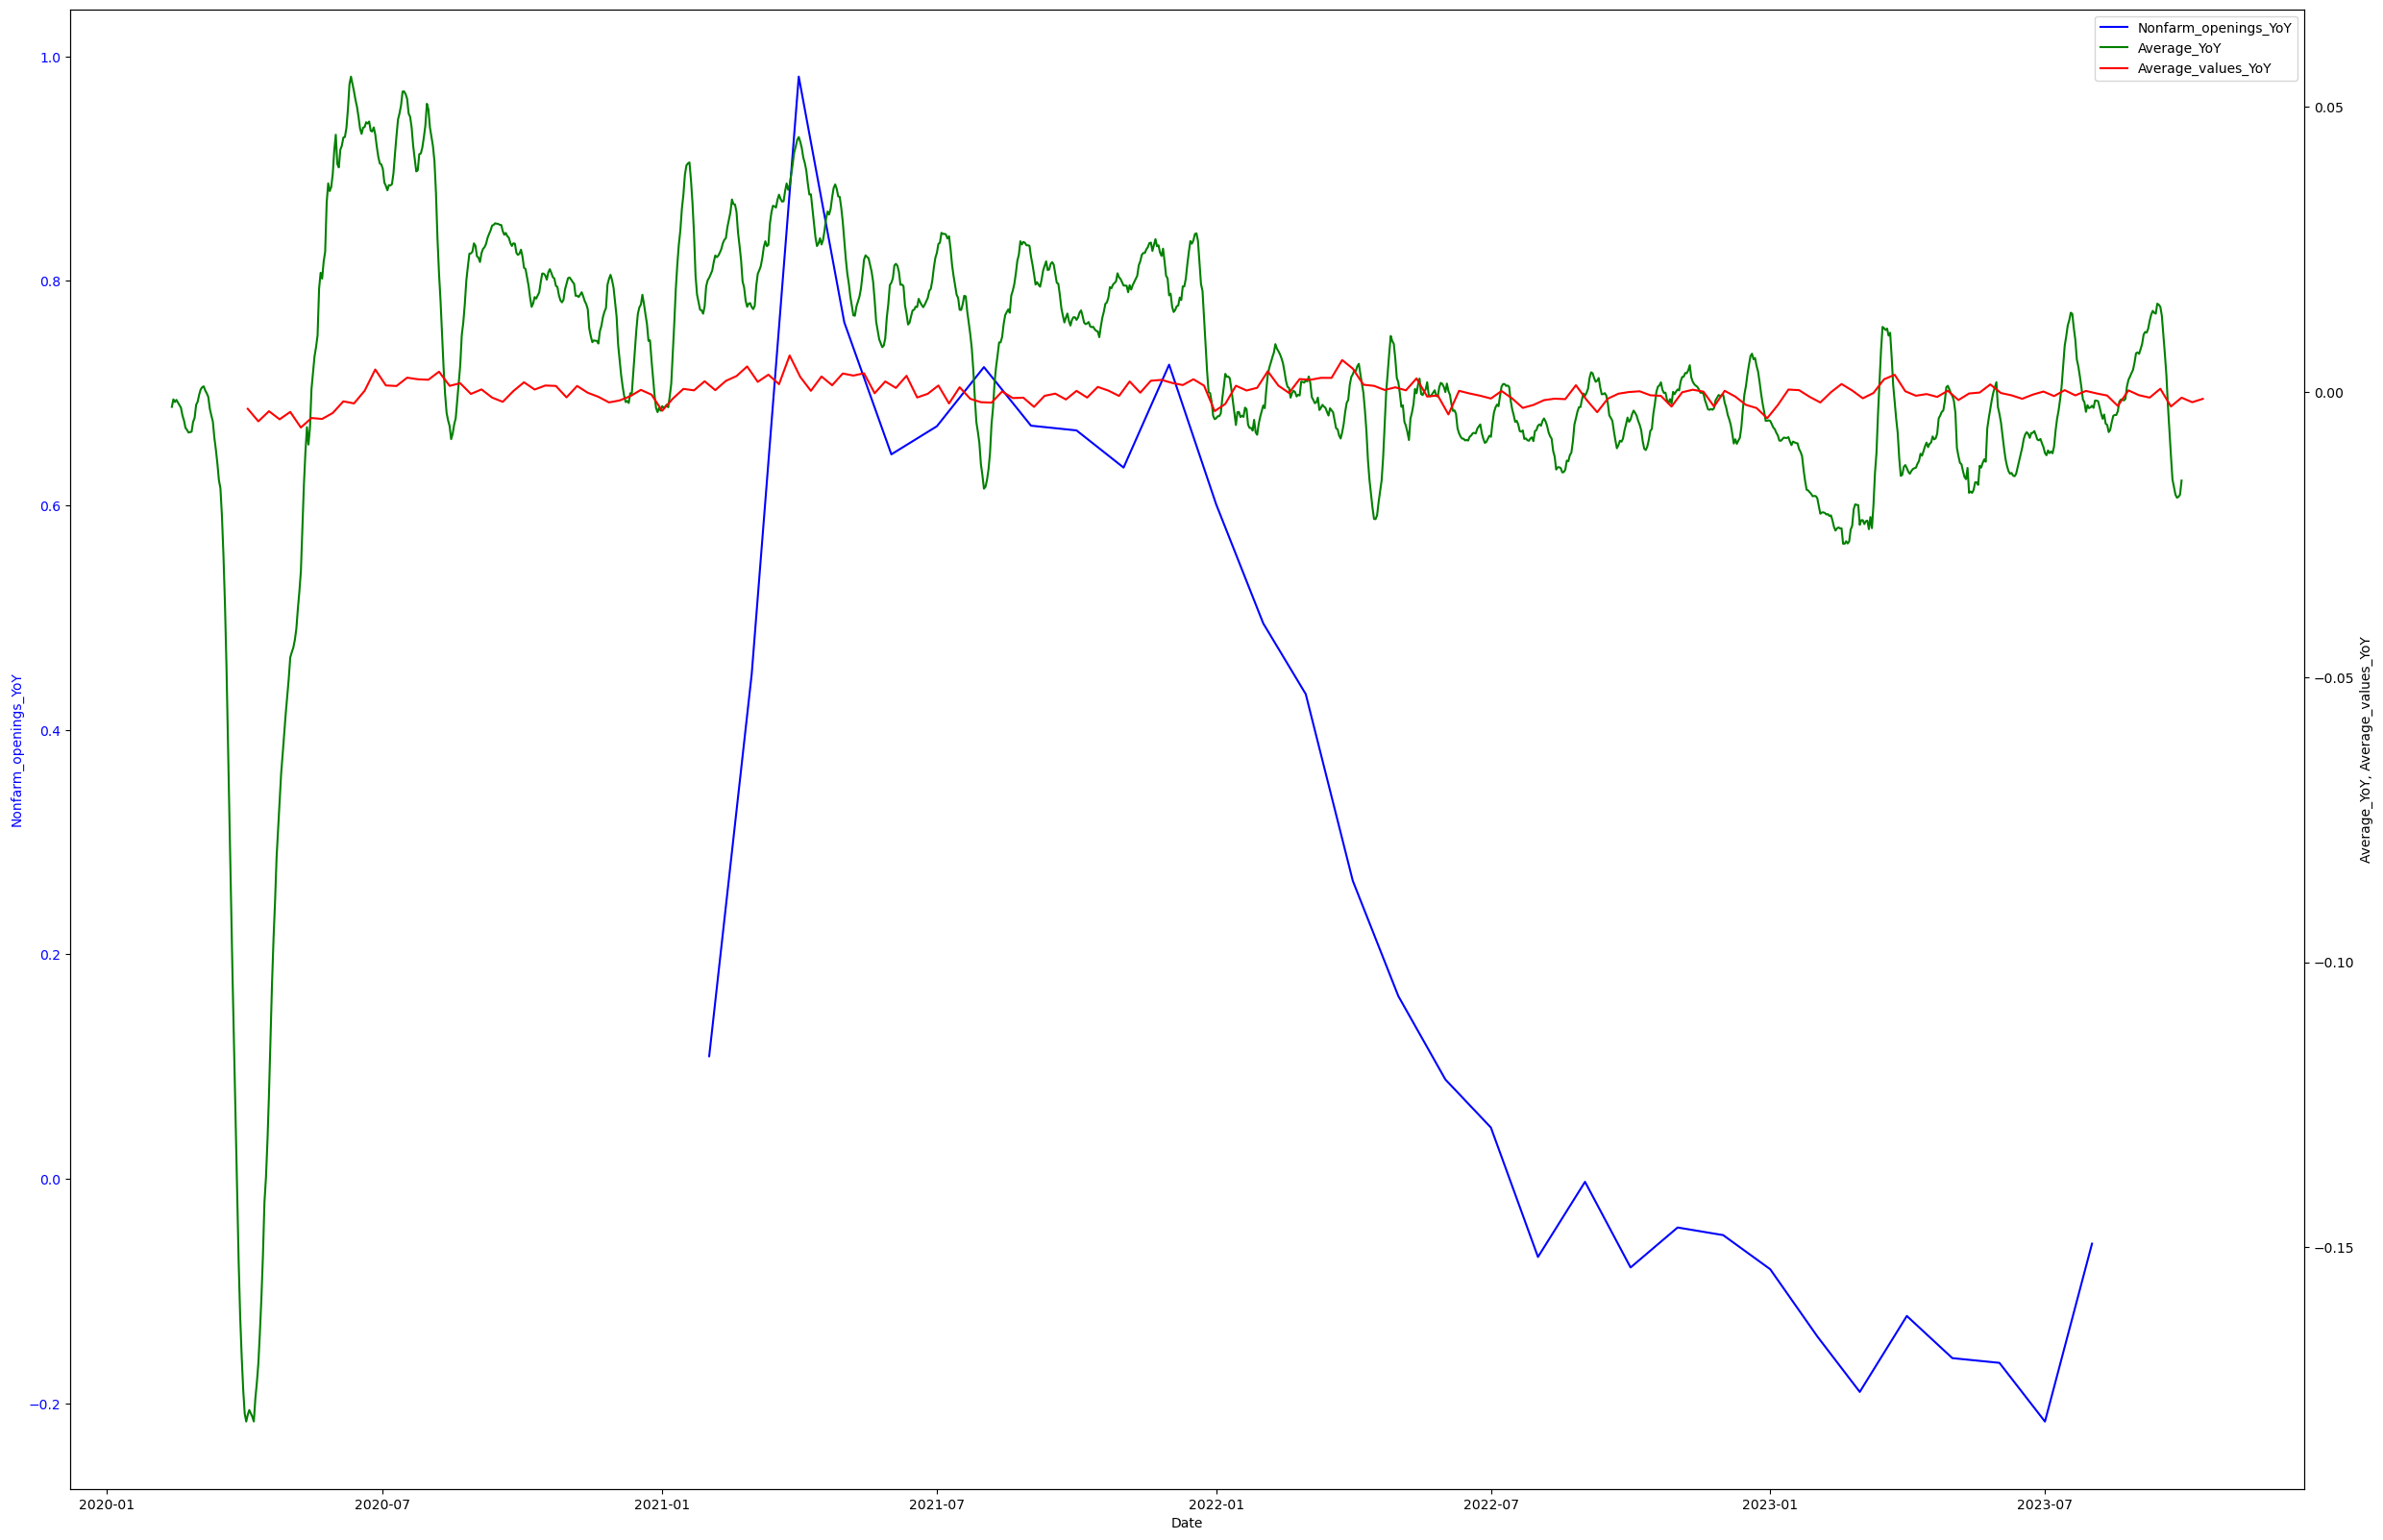

In [164]:
import matplotlib.pyplot as plt

def plot_columns_on_dual_axis(df1, col1, df2, col2, df3, col3, figsize=(10, 6)):
    """
    Plot specified columns from three dataframes on a dual y-axis plot.
    
    Parameters:
        df1, df2, df3: pandas DataFrames containing the data.
        col1, col2, col3: Names of the columns to plot.
        figsize: Tuple specifying the figure size (width, height).
    """
    fig, ax1 = plt.subplots(figsize=figsize)
    
    # Plot col1 from df1 using primary y-axis
    ax1.plot(df1.index, df1[col1], label=col1, color='b')
    ax1.set_xlabel('Date')
    ax1.set_ylabel(col1, color='b')
    ax1.tick_params(axis='y', labelcolor='b')
    
    # Create secondary y-axis for col2 and col3
    ax2 = ax1.twinx()
    ax2.plot(df2.index, df2[col2], label=col2, color='g')
    ax2.plot(df3.index, df3[col3], label=col3, color='r')
    ax2.set_ylabel(f"{col2}, {col3}")
    ax2.tick_params(axis='y')
    
    # Add legends
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines1 + lines2, labels1 + labels2, loc=0)
    
    plt.show()

# Example usage:
# Assuming df_jp_cleaned, df_merge, df_nfo_cleaned are your dataframes
plot_columns_on_dual_axis(
    df1=df_nfo_cleaned, col1='Nonfarm_openings_YoY',
    df2=df_merge, col2='Average_YoY',
    df3=df_jp_cleaned, col3='Average_values_YoY',
    figsize=(30, 20)
)


In [ ]:
df_jp_cleaned['Average_values_YoY'], df_merge['Average_YoY'], df_nfo_cleaned['Nonfarm_openings_YoY']

In [168]:
df_jp_cleaned

,bg_posts,Manufacuring,Financial_activities,Professional_Business,Education_Health,Leisure_Hospitality,bg_posts_jz1,bg_posts_jzgrp12,bg_posts_jz2,bg_posts_jz3,bg_posts_jzgrp345,bg_posts_jz4,bg_posts_jz5,Average,Average_values,Average_values_smooth,Log_weight,ZScore_weight,Normalized_Average_jp,Average_values/10,Average_values_YoY
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-10,-0.03780,-0.057400,-0.05110,-0.08910,-0.084900,0.016500,0.06980,0.005840,-0.001120,-0.05120,-0.063900,-0.06510,-0.09240,-0.053200,99.946800,NaN,2.302053,-0.296833,0.448055,9.994680,NaN
2020-01-17,0.11600,0.127000,0.08500,0.15100,0.160000,0.115000,0.08260,0.108000,0.110000,0.11300,0.125000,0.11200,0.23200,0.127600,100.127600,NaN,2.303860,0.630790,0.629362,10.012760,NaN
2020-01-24,-0.09540,-0.095700,-0.07080,-0.14500,-0.114000,-0.011000,-0.06840,-0.054600,-0.053100,-0.10900,-0.116000,-0.10900,-0.17900,-0.087300,99.912700,NaN,2.301712,-0.471788,0.413859,9.991270,NaN
2020-01-31,0.01750,0.026000,0.03690,0.08260,0.039500,-0.120000,-0.08400,-0.058900,-0.056100,0.04720,0.055300,0.06220,0.03950,0.013000,100.013000,100.000025,2.302715,0.042817,0.514440,10.001300,NaN
2020-02-07,-0.09450,-0.100000,-0.01570,-0.14700,-0.080200,-0.113000,-0.04100,-0.090700,-0.096100,-0.10700,-0.099900,-0.09250,-0.12000,-0.091180,99.908820,99.990530,2.301673,-0.491695,0.409968,9.990882,NaN
2020-02-14,0.20500,0.269000,0.20400,0.14000,0.208000,0.064800,0.14700,0.169000,0.172000,0.21000,0.217000,0.21600,0.23700,0.177160,100.177160,100.002920,2.304355,0.885065,0.679061,10.017716,NaN
2020-02-21,0.05890,0.094000,-0.02590,0.00357,0.088500,-0.140000,-0.02510,0.026500,0.032100,0.07270,0.073800,0.07280,0.08240,0.004034,100.004034,100.025753,2.302625,-0.003185,0.505449,10.000403,NaN
2020-02-28,0.07660,0.074300,0.14300,0.07420,0.097200,-0.016100,0.01700,0.008390,0.007450,0.03690,0.104000,0.10400,0.29600,0.074520,100.074520,100.041134,2.303330,0.358455,0.576133,10.007452,NaN
2020-03-06,0.02430,0.018100,-0.00266,-0.05640,0.033200,0.021100,0.12900,0.051600,0.043100,-0.00371,0.005730,0.00711,0.02440,0.002668,100.002668,100.064595,2.302612,-0.010193,0.504079,10.000267,NaN
